In [1]:
import numpy as np
import pandas as pd
import csv, glob, os, sys, math, functools
from astropy.timeseries import LombScargle
import matplotlib.pyplot as plt
import sys
from matplotlib.colors import LogNorm
import data_management
from scipy.fft import fft, fftfreq

In [2]:
def cm2inch(value):
    return value/2.54

plt.rc('xtick' , labelsize=10)    # fontsize of the tick labels
plt.rc('ytick' , labelsize=10)    # fontsize of the tick labels
plt.rc('legend', fontsize =10)    # legend fontsize
plt.rc('axes'  , titlesize=10)     # fontsize of the axes set_title
plt.rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
    "text.usetex": True,     # use inline math for ticks
    "pgf.rcfonts": False     # don't setup fonts from rc parameters
    })

    
linewidth = 1

width_images = 8.6


### Dynamics and Fourier spectrum starting from Schrodinger cat states

<ipython-input-25-9d018bb8b5fc>:113: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  a.set_ylim([0,0.05])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


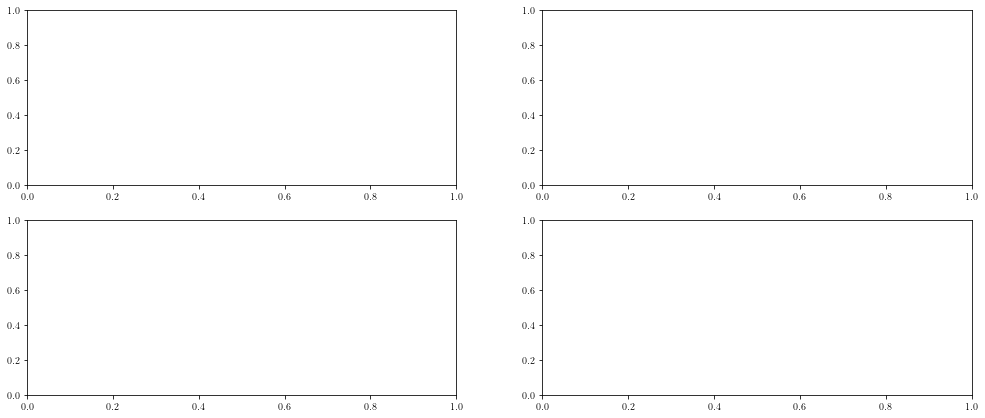

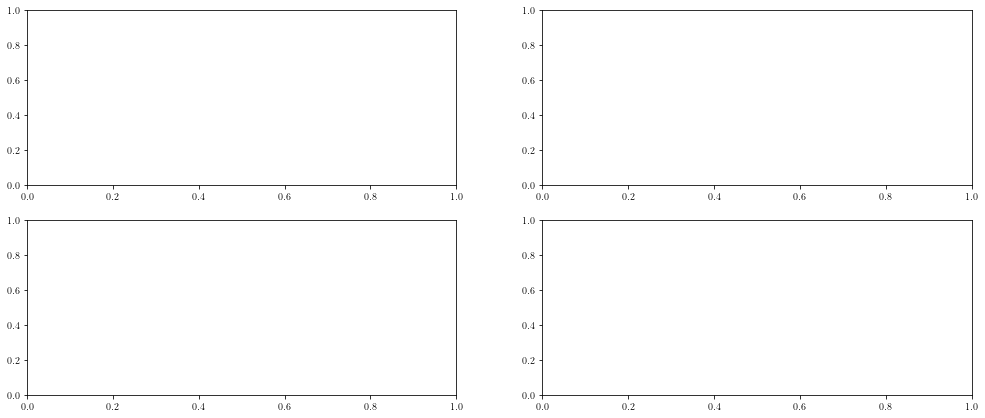

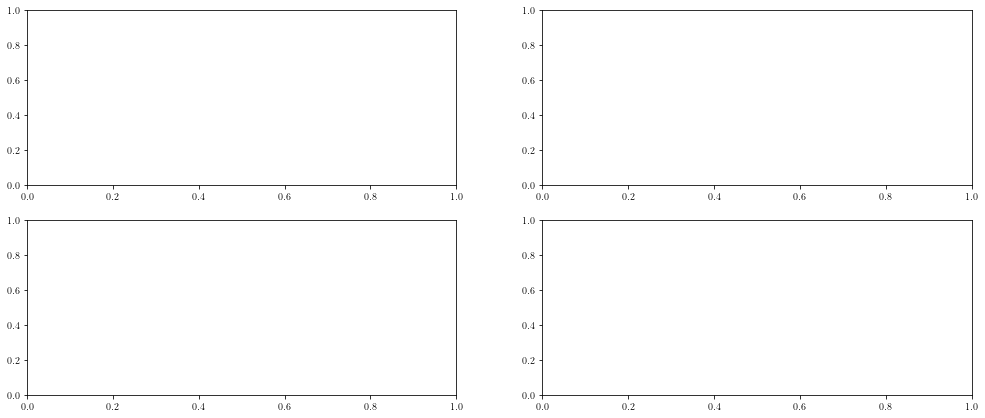

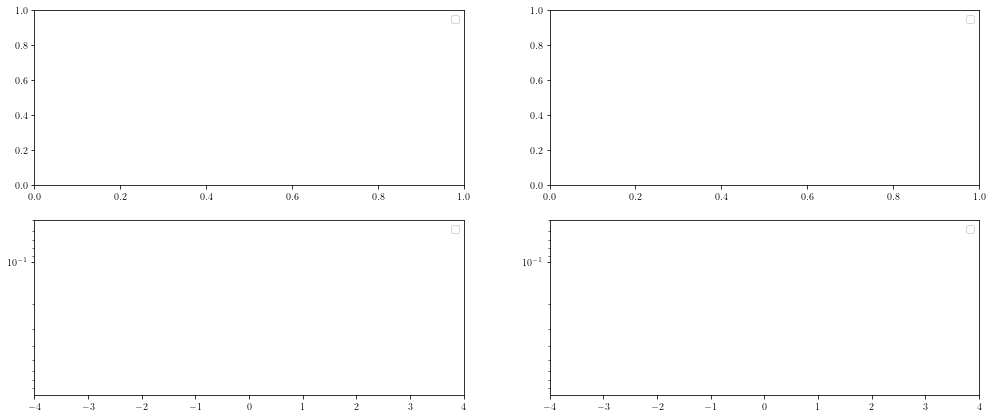

In [25]:
sys.path.append('/home/ricval/Documenti/Cavity_python/library')
import chaos
from matplotlib.colors import LogNorm

main_dir = '/home/ricval/Documenti/Cavity_python/heatmap_dynamical_phase/'
main_dir = '/home/ricval/Documenti/Cavity_python/data_paper/SU3_Gaussian_p_vs_W/'
main_dir = '/home/ricval/Documenti/Cavity_python/data_paper/SU3_Gaussian_swipe_p_theta_noise1E-8/'
height_images = 6
name_obs = 's12'

symbol = ['v','o','^','D']
style = ['-','-','dotted']
color = ['tab:blue','tab:red']
do_plots = True
main_dir
json_file = ""
save_data = False
name_swipe = "W"
L_list = [1]
d = 3
alpha = 0.25

p_list = [0 , 0.05, 0.10 ,0.15 ,0.20 ,0.25, 0.30]
W_list = [0.00,0.02,0.04,0.06,0.08,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1]
p_list = [0,0.1,0.2,0.3]
W_list = [0,0.08,0.20,0.3,0.4]
W_list = [0]

lyapunov_exponent = []
parameter = []



ncol = int(np.sqrt(len(W_list)))
ncol = len(W_list)+1
nrow = 2
# nrow = 1
# ncol = 1

# fig, ax = plt.subplots(ncol,nrow)
# ax = ax.flatten()



for p in p_list:
    
    fig, ax = plt.subplots(nrow,ncol,figsize=(cm2inch(width_images*5), cm2inch(height_images*3)))
    

    
    
    for index_W, W in enumerate(W_list):

        Delta_O = {}
        for i in range(d):
            for j in range(i+1,d):
                Delta_O[f's{i}{j}'] = []
        # for L in [10000,20000]:

        for L in L_list:

            O = {}
            for i in range(d):
                for j in range(i+1,d):
                    O[f's{i}{j}'] = []

            for idx in range(2):
                
                folder = f'{main_dir}SUN_Gaussian_L{L}_p{p:.3f}_W{W:.3f}_index{idx}'
                if not os.path.isdir(folder):
                    folder = f'{main_dir}SUN_Gaussian_L{L}_alpha{alpha:.2f}_p{3:.4f}_W{W:.3f}_index{idx}'

                if os.path.isdir(folder):
                    
                    for name in list(O.keys()):
                        if os.path.isfile(f'{folder}/{name}.npy'):
                            O[name] = np.abs(np.load(f'{folder}/{name}.npy'))
                    time = np.load(f'{folder}/timesteps.npy')

                    transient = int(len(time)*0.9)

                    if name_obs == '':
                        for name in list(O.keys()):
                            ax[0][index_W].plot(time,np.abs(O[name]),label=f'{L}',marker='.',markersize=1) 
                            obs = np.abs(O[name][transient:])
            
                            dt = time[1]-time[0]
                            N  = len(obs)
                
                            yf = fft(obs)
                            xf = fftfreq(N, dt)*2*math.pi

                            ax[1][index_W].plot(xf , 2.0/N * np.abs(yf), linestyle='-',linewidth=linewidth , label=f'{L}')

                    else:
                        ax[0][index_W].plot(time,np.abs(O[name_obs]),label=f'{L}',marker='.',markersize=1) 

                        obs = np.abs(O[name_obs][transient:])
            
                        dt = time[1]-time[0]
                        N  = len(obs)
            
                        yf = fft(obs)
                        xf = fftfreq(N, dt)*2*math.pi

                        ax[1][index_W].plot(xf , 2.0/N * np.abs(yf), linestyle='-',linewidth=linewidth , label=f'{L}')

                    ax[0][index_W].set_title(f'$W={W:.3f}$')

for a in ax[1]:
    a.set_yscale('log')
    a.set_xlim([-4,4])
    a.set_ylim([0,0.05])
    a.legend()

for a in ax[0]:
    # a.set_xlim([time[-1]-200,time[-1]])
    # a.set_xlim([1500,1700])
    # a.set_ylim([0.3502,0.3506])

    # a.set_ylim([0.353,0.3536])
    a.legend()



#### As above, I swipe $p$ at fixed $W$

In [ ]:
sys.path.append('/home/ricval/Documenti/Cavity_python/library')
import chaos
from matplotlib.colors import LogNorm

main_dir = '/home/ricval/Documenti/Cavity_python/heatmap_dynamical_phase/'
main_dir = '/home/ricval/Documenti/Cavity_python/data_paper/SU3_Gaussian_p_vs_W/'
main_dir = '/home/ricval/Documenti/Cavity_python/data_paper/SU3_Gaussian_swipe_p_theta_noise1E-8/'
height_images = 6
name_obs = 's12'

symbol = ['v','o','^','D']
style = ['-','-','dotted']
color = ['tab:blue','tab:red']
do_plots = True
main_dir
json_file = ""
save_data = False
name_swipe = "W"
L_list = [1]
d = 3
alpha = 0.25

p_list = [0 , 0.05, 0.10 ,0.15 ,0.20 ,0.25, 0.30]
W_list = [0.00,0.02,0.04,0.06,0.08,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1]
p_list = [0,0.1,0.2,0.3]
W_list = [0,0.08,0.20,0.3,0.4]
W_list = [0]

lyapunov_exponent = []
parameter = []



ncol = len(p_list)
nrow = 2
# nrow = 1
# ncol = 1

# fig, ax = plt.subplots(ncol,nrow)
# ax = ax.flatten()
fig, ax = plt.subplots(nrow,ncol,figsize=(cm2inch(width_images*5), cm2inch(height_images*3)))



for index_p , p in enumerate(p_list):
    
    
    Delta_O = {}
    for i in range(d):
        for j in range(i+1,d):
            Delta_O[f's{i}{j}'] = []
    
    for L in L_list:

        O = {}
        for i in range(d):
            for j in range(i+1,d):
                O[f's{i}{j}'] = []

        for idx in range(2):
            
            folder = f'{main_dir}SUN_Gaussian_L{L}_p{p:.3f}_W{W:.3f}_index{idx}'
            if not os.path.isdir(folder):
                folder = f'{main_dir}SUN_Gaussian_L{L}_alpha{alpha:.2f}_p{3:.4f}_W{W:.3f}_index{idx}'

            if os.path.isdir(folder):
                
                for name in list(O.keys()):
                    if os.path.isfile(f'{folder}/{name}.npy'):
                        O[name] = np.abs(np.load(f'{folder}/{name}.npy'))
                time = np.load(f'{folder}/timesteps.npy')

                transient = int(len(time)*0.9)

                if name_obs == '':
                    for name in list(O.keys()):
                        ax[0][index_W].plot(time,np.abs(O[name]),label=f'{L}',marker='.',markersize=1) 
                        obs = np.abs(O[name][transient:])
        
                        dt = time[1]-time[0]
                        N  = len(obs)
            
                        yf = fft(obs)
                        xf = fftfreq(N, dt)*2*math.pi

                        ax[1][index_W].plot(xf , 2.0/N * np.abs(yf), linestyle='-',linewidth=linewidth , label=f'{L}')

                else:
                    ax[0][index_W].plot(time,np.abs(O[name_obs]),label=f'{L}',marker='.',markersize=1) 

                    obs = np.abs(O[name_obs][transient:])
        
                    dt = time[1]-time[0]
                    N  = len(obs)
        
                    yf = fft(obs)
                    xf = fftfreq(N, dt)*2*math.pi

                    ax[1][index_W].plot(xf , 2.0/N * np.abs(yf), linestyle='-',linewidth=linewidth , label=f'{L}')

                ax[0][index_W].set_title(f'$W={W:.3f}$')

for a in ax[1]:
    a.set_yscale('log')
    a.set_xlim([-4,4])
    a.set_ylim([0,0.05])
    a.legend()

for a in ax[0]:
    # a.set_xlim([time[-1]-200,time[-1]])
    # a.set_xlim([1500,1700])
    # a.set_ylim([0.3502,0.3506])

    # a.set_ylim([0.353,0.3536])
    a.legend()



### Heatmap oscillations amplitudes

0 0.02
/home/ricval/Documenti/Cavity_python/data_paper/SU3_Gaussian_p_vs_W/SUN_Gaussian_L20000_alpha0.36_p0.000_W0.020_index0
3000.0
0.05 0.02
/home/ricval/Documenti/Cavity_python/data_paper/SU3_Gaussian_p_vs_W/SUN_Gaussian_L20000_alpha0.36_p0.050_W0.020_index0
3000.0
0.1 0.02
/home/ricval/Documenti/Cavity_python/data_paper/SU3_Gaussian_p_vs_W/SUN_Gaussian_L20000_alpha0.36_p0.100_W0.020_index0
3000.0
0.15 0.02
/home/ricval/Documenti/Cavity_python/data_paper/SU3_Gaussian_p_vs_W/SUN_Gaussian_L20000_alpha0.36_p0.150_W0.020_index0
3000.0
0.2 0.02
/home/ricval/Documenti/Cavity_python/data_paper/SU3_Gaussian_p_vs_W/SUN_Gaussian_L20000_alpha0.36_p0.200_W0.020_index0
3000.0
0.25 0.02
/home/ricval/Documenti/Cavity_python/data_paper/SU3_Gaussian_p_vs_W/SUN_Gaussian_L20000_alpha0.36_p0.250_W0.020_index0
3000.0
0.275 0.02
/home/ricval/Documenti/Cavity_python/data_paper/SU3_Gaussian_p_vs_W/SUN_Gaussian_L20000_alpha0.36_p0.275_W0.020_index0
3000.0
0.29 0.02
/home/ricval/Documenti/Cavity_python/data_

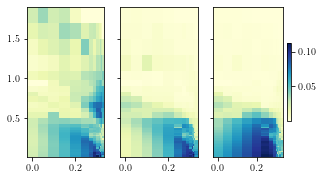

In [23]:
main_dir = '/home/ricval/Documenti/Cavity_python/data_paper/SU3_Gaussian_p_vs_W/'
main_dir
json_file = ""
save_data = False
name_swipe = "W"
L = 20000
d = 3
alpha = 0.36

p_list = [0 , 0.05, 0.10 ,0.15 ,0.20 ,0.25, 0.30]
p_list += [0.025, 0.075, 0.125, 0.175, 0.225, 0.275, 0.325, 0.333]
p_list += [0.305, 0.310, 0.315, 0.320, 0.330]
p_list =  [0.299,0.305, 0.310, 0.315, 0.320, 0.325, 0.330]
p_list = [0,0.05,0.1,0.15,0.2,0.25,0.275,0.29,0.305,0.310,0.315,0.32,0.33]
p_list.sort()

# W_list = [j * 0.01 for j in range(170)]
# W_list = [0.00]
W_list = [0.01 * j for j in range(2,42,2)]
# W_list += [0.10 + 0.01 * j for j in range(2,10,2)]
# W_list += [0.20 + 0.01 * j for j in range(2,10,2)]
W_list += [0.6,0.8,1.0,1.2,1.4,1.6,1.8]
W_list += [0.45, 0.55, 0.65, 0.75, 0.85, 0.95]
# W_list += [1.00, 1.10, 1.20, 1.30, 1.40, 1.50]
W_list.sort()

fig, ax = plt.subplots(1,3,sharey='row',sharex=True,figsize=(cm2inch(12), cm2inch(7)))

lyapunov_exponent = []
parameter = []

Delta_O = {}
for i in range(d):
    for j in range(i+1,d):
        Delta_O[f's{i}{j}'] = []

for W in W_list:

    
    parameter_single_p = []
    O_max = {}
    for i in range(d):
        for j in range(i+1,d):
            O_max[f's{i}{j}'] = []

    for p in p_list:
        print(f'{p} {W}')

        O = {}
        for i in range(d):
            for j in range(i+1,d):
                O[f's{i}{j}'] = []

        
        exist = 0
        for idx in range(1):
            
            folder = f'{main_dir}SUN_Gaussian_L{L}_p{p:.3f}_W{W:.3f}_index{idx}'
            if not os.path.isdir(folder):
                    folder = f'{main_dir}SUN_Gaussian_L{L}_alpha{alpha:.2f}_p{p:.3f}_W{W:.3f}_index{idx}'


            if os.path.isdir(folder):
                if idx == 0:
                    print(folder)

                for name in list(O.keys()):
                    if os.path.isfile(f'{folder}/{name}.npy'):
                        O[name].append(np.abs(np.load(f'{folder}/{name}.npy')))
                time = np.load(f'{folder}/timesteps.npy')

                    
                exist += 1
                print(time[-1])
                transient = int(len(time)*0.9)

       
                for name in list(O.keys()):
                    obs_t0 = O[name][-1][0]
                    obs_t0 = 1
                    obs = O[name][-1][transient:]
                    obs_av = np.average(obs)
                    O_max[name].append( np.sqrt(np.average( (obs-obs_av)**2 ))/obs_t0 )
            
            else:
                
                for name in list(O.keys()):
                    O_max[name].append(float('nan'))
                    # W_missing.append(W)

        parameter_single_p.append((p,W))
    parameter.append(parameter_single_p)
    for name in list(Delta_O.keys()):
        print(O_max[name])
        Delta_O[name].append(O_max[name])
    
lyapunov_exponent = np.array(lyapunov_exponent)
parameter = np.array(parameter)
# print(np.transpose(parameter))



print(np.array(Delta_O['s01']).shape)


print(W_list)
pcm = ax[0].pcolormesh(p_list,W_list,np.array(Delta_O['s01'])
                    # ,norm=LogNorm(vmin= 1E-2, vmax=1)
                    ,cmap="YlGnBu")

pcm = ax[1].pcolormesh(p_list,W_list,np.array(Delta_O['s12'])
                    # ,norm=LogNorm(vmin= 1E-2, vmax=1)
                    ,cmap="YlGnBu")

pcm = ax[2].pcolormesh(p_list,W_list,np.array(Delta_O['s02'])
                    # ,norm=LogNorm(vmin= 1E-2, vmax=1)
                    ,cmap="YlGnBu")

# ax.set_yticklabels = W_list
# ax.set_xticklabels = p_list
fig.colorbar(pcm, ax=ax[2],location='right',fraction=0.05)
# for a in ax:
#     a.set_yscale('log')
plt.show()

### Same as bove but we fix $W$ and we swipe $p$

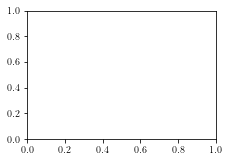

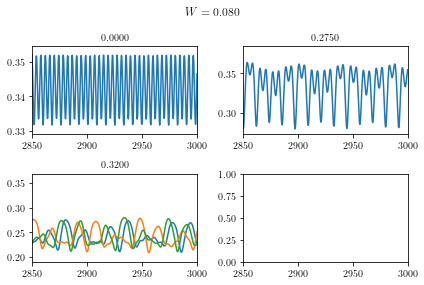

In [90]:
sys.path.append('/home/ricval/Documenti/Cavity_python/library')
import chaos
from matplotlib.colors import LogNorm

main_dir = '/home/ricval/Documenti/Cavity_python/heatmap_dynamical_phase/'
main_dir = '/home/ricval/Documenti/Cavity_python/data_paper/SU3_Gaussian_p_vs_W/'
height_images = 6


symbol = ['v','o','^','D']
style = ['-','-','dotted']
color = ['tab:blue','tab:red']
do_plots = True
main_dir
json_file = ""
save_data = False
name_swipe = "W"
L = 10000
d = 3

p_list = [0 , 0.05, 0.10 ,0.15 ,0.20 ,0.25, 0.30]
p_list += [0.025, 0.075, 0.125, 0.175, 0.225, 0.275, 0.325, 0.333]
p_list += [0.305, 0.310, 0.315, 0.320, 0.330]
W_list = [0.00]
W_list += [0.01 * j for j in range(2,10,2)]
W_list += [0.10 + 0.01 * j for j in range(2,10,2)]
W_list += [0.10 * j for j in range(2,10,2)]
W_list += [1.00, 1.10, 1.20, 1.30, 1.40, 1.50]
W_list = [0.05]
p_list = [0.000,0.1,0.15,0.2,0.25,0.291,0.292,0.293]
p_list = [0.000,0.275,0.32]
# p_list = [0.25]
p_list.sort()
W_list.sort()
W_list = [0.08]
# W_list = [0]
fig, ax = plt.subplots(1,1,sharey='row',sharex=True,figsize=(cm2inch(width_images), cm2inch(height_images)))

lyapunov_exponent = []
parameter = []

Delta_O = {}
for i in range(d):
    for j in range(i+1,d):
        Delta_O[f's{i}{j}'] = []

ncol = int(np.sqrt(len(p_list)))
ncol = len(p_list)//3 + 1
nrow = 2


for W in W_list:
    
    fig, ax = plt.subplots(nrow,ncol)
    ax = ax.flatten()
    
    parameter_single_p = []
    O_max = {}
    for i in range(d):
        for j in range(i+1,d):
            O_max[f's{i}{j}'] = []

    for index_p, p in enumerate(p_list):

        O = {}
        for i in range(d):
            for j in range(i+1,d):
                O[f's{i}{j}'] = []

        exist = 0
        for idx in range(3):
            
            folder = f'{main_dir}SUN_Gaussian_L{L}_p{p:.3f}_W{W:.3f}_index{idx}'
            if os.path.isdir(folder):
                
                # print(folder)

                for name in list(O.keys()):
                    if os.path.isfile(f'{folder}/{name}.npy'):
                        O[name] = np.abs(np.load(f'{folder}/{name}.npy'))
                time = np.load(f'{folder}/timesteps.npy')

                for name in list(O.keys()):
                    if name == 's01':
                        ax[index_p].plot(time,O[name])
                ax[index_p].set_title(f'{p:.4f}')

                exist += 1

    fig.suptitle(f'$W={W:.3f}$')

    for a in ax:
        a.set_xlim([time[-1]-150,time[-1]])

    plt.tight_layout()
            
    plt.show()

### Fig 2 - $W=0$ and different number of levels $N$

/home/ricval/Documenti/Cavity_python/Fig_2/mean_field_SU4_coherent_state/mean_field_SU4_1
/home/ricval/Documenti/Cavity_python/Fig_2/mean_field_SU3_coherent_state/mean_field_SU3_1
/home/ricval/Documenti/Cavity_python/Fig_2/mean_field_SU2_coherent_state/mean_field_SU2_1


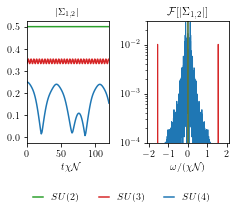

In [5]:
plot_dir = '/home/ricval/Documenti/Cavity/DPT_SUn_paper/final_images'
main_folder = '/home/ricval/Documenti/Cavity_python/Fig_2/'
prefix_folder = 'mean_field'
suffix_folder = ['SU2','SU3','SU4']
suffix_folder = suffix_folder[::-1]
legend = ['SU(2)','SU(3)','SU(4)']
legend = legend[::-1]

type_state = 'coherent_state'


color = ['tab:blue','tab:red','tab:green']
obs = 's01'




fig, (ax1,ax2) = plt.subplots(1,2,figsize=(cm2inch(width_images), cm2inch(6.6)))



for idx, name in enumerate(suffix_folder):
    folder = f'{main_folder}{prefix_folder}_{name}_{type_state}/{prefix_folder}_{name}_1'
    if os.path.isdir(folder):
        print(folder)
        file_obs = f'{folder}/{obs}.npy'
        file_t = f'{folder}/time.npy'

        if os.path.isfile(file_obs) and os.path.isfile(file_t):
            O = np.abs(np.load(file_obs))
            t = np.load(file_t)
            
            dt = t[1]-t[0]
            N  = len(t)
            
            yf = fft(O)
            xf = fftfreq(N, dt)*2*math.pi

            ax2.plot(xf , 2.0/N * np.abs(yf), linestyle='-',linewidth=linewidth , alpha=1,color=color[idx])

            ax1.plot(t,np.abs(O),label=f'${legend[idx]}$',color=color[idx])
            
# ax.legend()
ax1.set_xlim([0,120])
# ax1.set_ylim([0.5,1.1])
ax1.set_xticks(np.arange(0,120,step=50))

ax2.set_xlim([-2.1,2.1])

# ax2.set_xlim([1E-2,2.1])
ax2.set_ylim([1E-4,0.03])
ax2.set_xticks([-2,-1,0,1,2])
ax2.set_title('$\mathcal{F}[|\Sigma_{1,2}|]$',fontsize=11)
ax2.set_xlabel('$\omega/(\chi\mathcal{{N}})$')
ax2.set_yscale('log')
ax1.set_xlabel('$t\chi \mathcal{{N}}$',y=0.09,x=0.53)
ax1.set_title('$|\Sigma_{1,2}|$')
plt.tight_layout()
handles, labels = ax1.get_legend_handles_labels()
# ax.legend(reversed(handles), reversed(labels)
ax1.legend(reversed(handles), reversed(labels),ncol=3,frameon=False,loc='lower center',bbox_to_anchor=(1.15, -0.57),handlelength=1)
plt.savefig(f'{plot_dir}/dynamics_homogeneous_initial_state_equal_populations_W0_swipe_number_levels_UNIFORM_v2.pdf',bbox_inches='tight',pad_inches = 0)
plt.show()

### Scaling analysis as a function of time step size for chaos induced via quantum fluctuactions.

In [ ]:
sys.path.append('/home/ricval/Documenti/Cavity_python/library')
import chaos
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.signal import argrelextrema

props = dict(boxstyle='round', facecolor='white', alpha=0.5)

horizonal_inset = False

results_dir = '/home/ricval/Documenti/Cavity_python/SU3_Lyapunov_swipe_p_W0.00/'
results_dir = '/home/ricval/Documenti/Cavity_python/data_paper/SU3_Lyapunov_swipe_p_W0.00/'
results_dir = '/home/ricval/Documenti/Cavity_python/data_paper/SU3_Lyapunov_swipe_p_W0.00_1E-8_dt1000/'
list_results_dir = ['/home/ricval/Documenti/Cavity_python/data_paper/SU3_Lyapunov_swipe_p_W0.00_1E-8_dt2000/','/home/ricval/Documenti/Cavity_python/data_paper/SU3_Lyapunov_swipe_p_W0.00_1E-8_dt1000/','/home/ricval/Documenti/Cavity_python/data_paper/SU3_Lyapunov_swipe_p_W0.00_1E-8/']
list_results_dir = ['/home/ricval/Documenti/Cavity_python/data_paper/SU3_Lyapunov_swipe_p_W0.00_1E-8/']

plot_dir = '/home/ricval/Documenti/Cavity/DPT_SUn_paper/final_images'

L = 1
d = 3
W = 0

# p_list = np.linspace(0.25,1/3,num=100)
p_list = np.linspace(0.28,1/3,num=100)

for idx, p in enumerate(p_list):
    p_list[idx] = round(p,4)
p_plot = [0.2994, 0.3064]
p_plot = [0.2994,0.3226]
# p_plot = [0.3064,0.3107]
# p_plot = [0.2800, 0.3333]
# p_plot = [0.3236,0.3231]
# 0.3005 0.3188
#  0.3193
# p_plot = [0.3123, 0.3306]
# 0.3172, 0.3177, 0.3182, 0.3188, 0.3193
height_images = 7.4
lyapunov_exponent_abs = True
x_1 = 0.12
y_1 = 0.67
width = 0.35
height = 0.24

symbol = ['v','o','^','D']
style = ['-','-','-']
color = ['tab:blue','tab:red','tab:green']
color_marker = ['tab:blue','tab:orange']
text = ["IV","IV${{}}^\star$"]

fig, ax = plt.subplots(1,1,figsize=(cm2inch(width_images), cm2inch(height_images)))
fig_dO, ax_dO = plt.subplots(1,3,figsize=(cm2inch(width_images)*2, cm2inch(height_images)))

ax.set_xlabel('$p$')
ax.set_title('$\lambda/(\chi\mathcal{{N}})$')

# insets

# horizontal
if horizonal_inset:
    ax_1 = ax.inset_axes([x_1 , y_1 , width, height])
    ax_2 = ax.inset_axes([x_1 + width , y_1 , width, height])
    ax_2.get_yaxis().set_visible(False)
    ax_1.set_title('$\Sigma_{{1,2}}$',x=1)

    for a in [ax_1,ax_2]:   
        a.set_xlabel('$t\chi\mathcal{{N}}$',fontsize=8)

# vertical
else:
    ax_1 = ax.inset_axes([x_1 , y_1 , width, height])
    ax_2 = ax.inset_axes([x_1 , y_1 - height, width, height])
    ax_1.get_xaxis().set_visible(False)
    ax_1.set_title('$\Sigma_{{1,2}}$',fontsize=8)
    ax_2.set_xlabel('$t\chi\mathcal{{N}}$',fontsize=8)

ax_inset = [ax_1,ax_2]
for a in ax_inset:
    a.tick_params(axis='both', which='major', labelsize=8)
    a.tick_params(axis='both', which='minor', labelsize=8)
    # a.set_title('$\overline{\Sigma}_{{1,2}}$')


for results_dir in list_results_dir:

    p_exist = []
    lyapunov_exponent  = []
    dlyapunov_exponent = []
    error_list = []
    for p in p_list:

        O = {}
        for i in range(d):
            for j in range(i+1,d):
                O[f's{i}{j}'] = []

        exist = 0
        for idx in range(12):
            folder = f'{results_dir}SU{d}_Gaussian_L{L}_W{W:.3f}_p{p:.4f}_index{idx}'
            folder = f'{results_dir}SU{d}_Gaussian_L{L}_p{p:.3f}_W{W:.3f}_index{idx}'
            folder = f'{results_dir}SU{d}_Gaussian_L{L}_alpha0.25_p{p:.3f}_W{W:.3f}_index{idx}'

            if os.path.isdir(folder):
                exist += 1
                # if idx == 0:
                    # print(folder)
                time = np.load(f'{folder}/timesteps.npy')
                index_t = time<10000

                time = time[index_t]

                for name in list(O.keys()):
                    if os.path.isfile(f'{folder}/{name}.npy'):
                        o = np.load(f'{folder}/{name}.npy')
                        O[name].append(o[index_t])

                
                if p in p_plot and idx < 3:

                    ax_inset[p_plot.index(p)].plot(time,np.abs(O['s01'][-1]),linewidth=linewidth,linestyle=style[idx],color=color[idx])
                    x_text = 0.8
                    y_text = 0.3
                    off_set = 220
                    # off_set = time[-1]
                    T = 800
                    ax_inset[p_plot.index(p)].set_xlim([T-off_set,T])
                    ax_inset[p_plot.index(p)].set_xticks(np.arange(T-off_set,T+1,step=60))

                    x_text = 0.05
                    y_text = 0.05
                    x_text = 0.1
                    y_text = 0.1
                    ax_inset[p_plot.index(p)].text(x_text,y_text, f'{text[p_plot.index(p)]}', transform=ax_inset[p_plot.index(p)].transAxes, size=8,bbox=props)


        if exist > 2:
            p_exist.append(p)
            # l , t,  dO = chaos.compute_lyapunov_exponent(O,time,max_dO=1E-3,order=1)
            # l , t,  dO = chaos.compute_lyapunov_exponent(O,time)
            l , t, dO , error = chaos.compute_average_lyapunov_exponent(O,time,max_dO=np.log(0.005),min_dO=-20,order=10,transient=0)
            lyapunov_exponent.append(l[0])
            dlyapunov_exponent.append(l[1])
            error_list.append(error)

            if p in p_plot:
                ax_dO[p_plot.index(p)].plot(t,np.exp(dO[0]))
                if l[0] > 0:
                    ax_dO[p_plot.index(p)].plot(t,np.exp(l[0]*t),linestyle='--',color='black')


    for a in ax_dO:
        a.set_yscale('log')
        a.set_xscale('log')    

    # if horizonal_inset:
    xmin , xmax = ax_1.get_xlim()
    ymin_1 , ymax_1 = ax_1.get_ylim()
    ymin_2 , ymax_2 = ax_2.get_ylim()

    ymin = [ymin_1,ymin_2]
    ymax = [ymax_1,ymax_2]

    ymin = min(ymin_1,ymin_2)
    ymax = max(ymax_1,ymax_2)

    for idx, a in enumerate(ax_inset):
        a.set_ylim([ymin,ymax])
        # a.set_yticks(np.round(np.linspace(round(ymin,2),round(ymax,2),num=3),1))
        x = xmin + 0.1*(xmax-xmin)
        # y = ymax[idx] - 0.2*(ymax[idx]-ymin[idx])
        y = ymax - 0.13*(ymax-ymin)
        
        print(x)
        print(y)
        a.scatter(x,y,marker=symbol[idx],color=color_marker[idx],linewidths=1,edgecolors='black',zorder=2)

    # for idx , item in enumerate(lyapunov_exponent):
    #     if item < 0.01:
    #         lyapunov_exponent[idx] = 0

    print(p_exist)
    print(lyapunov_exponent)
    for idx, p in enumerate(p_plot):
        if p in p_exist:
            ax.plot(p,lyapunov_exponent[p_exist.index(p)],marker=symbol[idx],markersize=8,color=color_marker[idx],markeredgewidth=1,markeredgecolor='black')

    lyapunov_exponent = np.array(lyapunov_exponent)
    index = lyapunov_exponent < 1E-4
    print(p_list[index])
    ax.axhline(y=0, color='grey', linestyle='--',linewidth=linewidth)
    ax.errorbar(p_exist,lyapunov_exponent,yerr=dlyapunov_exponent , linestyle='-',color='black',linewidth=linewidth,marker='.',markersize=2)
    ax_dO[2].plot(p_exist,error_list)
    plt.tight_layout()
    ax.set_xticks([0.28,0.29,0.30,0.31,0.32,0.33])
    # if len(x_plot) > 0:
    #     fig.savefig(f"trajectories_lyapunov_exponent_classical_state_W{args['W']}_swipe_p.pdf",bbox_inches='tight',pad_inches = 0)
    # fig_lyap.savefig(f"lyapunov_exponent_classical_state_W{args['W']}_swipe_p.pdf",bbox_inches='tight',pad_inches = 0)

    # fig_lyap.savefig(f"lyapunov_exponent_gaussian_state_W0_swipe_p_new_state.pdf",bbox_inches='tight',pad_inches = 0)

    fig.subplots_adjust(wspace=0)
    fig.subplots_adjust(hspace=0)

# fig.savefig(f"{plot_dir}/lyapunov_exponent_and_dynamics_gaussian_state_L1_W0_swipe_p_v6_dO1E-8.pdf",bbox_inches='tight',pad_inches = 0)
plt.show()


### Fig 4: Lyapunov exponent as a function of $p$ at disorder $W=0$. 
#### Simulations obtained from Gaussian states. The states are given by the superposition $|\psi_j\rangle = (|\gamma_1\rangle + |\gamma_2\rangle) / \sqrt{2}$ with $\gamma_1 = (\sqrt{1/3+p},\sqrt{1/3},\sqrt{1/3-p})$ and $\gamma_2 = (\sqrt{1/3},\sqrt{1/3-p},\sqrt{1/3+p})$. 
#### The results are for $\alpha=0.36$ (we have $g_1 = \sqrt{\omega_0}\sin(\alpha\pi)$ and $g_2 = \sqrt{\omega_0}\cos(\alpha\pi)$ where $\omega_0=1$ (being in the adiabatic limit, thus it is not important))

602.0
0.37825448336671263
602.0
0.37825448336671263
[0.28, 0.2805, 0.2811, 0.2816, 0.2822, 0.2827, 0.2832, 0.2838, 0.2843, 0.2848, 0.2854, 0.2859, 0.2865, 0.287, 0.2875, 0.2881, 0.2886, 0.2892, 0.2897, 0.2902, 0.2908, 0.2913, 0.2919, 0.2924, 0.2929, 0.2935, 0.294, 0.2945, 0.2951, 0.2956, 0.2962, 0.2967, 0.2972, 0.2978, 0.2983, 0.2989, 0.2994, 0.2999, 0.3005, 0.301, 0.3015, 0.3021, 0.3026, 0.3032, 0.3037, 0.3042, 0.3048, 0.3053, 0.3059, 0.3064, 0.3069, 0.3075, 0.308, 0.3086, 0.3091, 0.3096, 0.3102, 0.3107, 0.3112, 0.3118, 0.3123, 0.3129, 0.3134, 0.3139, 0.3145, 0.315, 0.3156, 0.3161, 0.3166, 0.3172, 0.3177, 0.3182, 0.3188, 0.3193, 0.3199, 0.3204, 0.3209, 0.3215, 0.322, 0.3226, 0.3231, 0.3236, 0.3242, 0.3247, 0.3253, 0.3258, 0.3263, 0.3269, 0.3274, 0.3279, 0.3285, 0.329, 0.3296, 0.3301, 0.3306, 0.3312, 0.3317, 0.3323, 0.3328, 0.3333]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.011853381821794627, 0.01185338182179

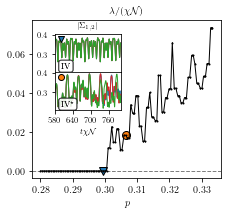

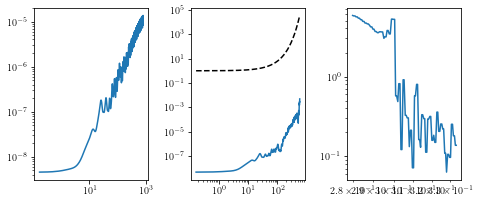

In [10]:
sys.path.append('/home/ricval/Documenti/Cavity_python/library')
import chaos
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.signal import argrelextrema

props = dict(boxstyle='round', facecolor='white', alpha=0.5)

horizonal_inset = False

results_dir = '/home/ricval/Documenti/Cavity_python/SU3_Lyapunov_swipe_p_W0.00/'
results_dir = '/home/ricval/Documenti/Cavity_python/data_paper/SU3_Lyapunov_swipe_p_W0.00/'
results_dir = '/home/ricval/Documenti/Cavity_python/data_paper/SU3_Lyapunov_swipe_p_W0.00_1E-8/'

plot_dir = '/home/ricval/Documenti/Cavity/DPT_SUn_paper/final_images'

L = 1
d = 3
W = 0

# p_list = np.linspace(0.25,1/3,num=100)
p_list = np.linspace(0.28,1/3,num=100)

for idx, p in enumerate(p_list):
    p_list[idx] = round(p,4)
p_plot = [0.2994, 0.3064]

height_images = 7.4
lyapunov_exponent_abs = True
x_1 = 0.12
y_1 = 0.67
width = 0.35
height = 0.24

symbol = ['v','o','^','D']
style = ['-','-','-']
color = ['tab:blue','tab:red','tab:green']
color_marker = ['tab:blue','tab:orange']
text = ["IV","IV${{}}^\star$"]

fig, ax = plt.subplots(1,1,figsize=(cm2inch(width_images), cm2inch(height_images)))
fig_dO, ax_dO = plt.subplots(1,3,figsize=(cm2inch(width_images)*2, cm2inch(height_images)))

ax.set_xlabel('$p$')
ax.set_title('$\lambda/(\chi\mathcal{{N}})$')

# insets

# horizontal
if horizonal_inset:
    ax_1 = ax.inset_axes([x_1 , y_1 , width, height])
    ax_2 = ax.inset_axes([x_1 + width , y_1 , width, height])
    ax_2.get_yaxis().set_visible(False)
    ax_1.set_title('$|\Sigma_{{1,2}}|$',x=1)

    for a in [ax_1,ax_2]:   
        a.set_xlabel('$t\chi\mathcal{{N}}$',fontsize=8)

# vertical
else:
    ax_1 = ax.inset_axes([x_1 , y_1 , width, height])
    ax_2 = ax.inset_axes([x_1 , y_1 - height, width, height])
    ax_1.get_xaxis().set_visible(False)
    ax_1.set_title('$|\Sigma_{{1,2}}|$',fontsize=8)
    ax_2.set_xlabel('$t\chi\mathcal{{N}}$',fontsize=8)

ax_inset = [ax_1,ax_2]
for a in ax_inset:
    a.tick_params(axis='both', which='major', labelsize=8)
    a.tick_params(axis='both', which='minor', labelsize=8)
    # a.set_title('$\overline{\Sigma}_{{1,2}}$')



p_exist = []
lyapunov_exponent  = []
dlyapunov_exponent = []
error_list = []
for p in p_list:

    O = {}
    for i in range(d):
        for j in range(i+1,d):
            O[f's{i}{j}'] = []

    exist = 0
    for idx in range(12):
        folder = f'{results_dir}SU{d}_Gaussian_L{L}_p{p:.3f}_W{W:.3f}_index{idx}'

        if os.path.isdir(folder):
            exist += 1
            
            time = np.load(f'{folder}/timesteps.npy')
            index_t = time<10000

            time = time[index_t]

            for name in list(O.keys()):
                if os.path.isfile(f'{folder}/{name}.npy'):
                    o = np.load(f'{folder}/{name}.npy')
                    O[name].append(o[index_t])

            
            if p in p_plot and idx < 3:

                ax_inset[p_plot.index(p)].plot(time,np.abs(O['s01'][-1]),linewidth=linewidth,linestyle=style[idx],color=color[idx])
                x_text = 0.8
                y_text = 0.3
                off_set = 220
                T = 800
                ax_inset[p_plot.index(p)].set_xlim([T-off_set,T])
                ax_inset[p_plot.index(p)].set_xticks(np.arange(T-off_set,T+1,step=60))

                x_text = 0.05
                y_text = 0.05
                x_text = 0.1
                y_text = 0.1
                ax_inset[p_plot.index(p)].text(x_text,y_text, f'{text[p_plot.index(p)]}', transform=ax_inset[p_plot.index(p)].transAxes, size=8,bbox=props)


    if exist > 2:
        p_exist.append(p)
        l , t, dO , error = chaos.compute_average_lyapunov_exponent(O,time,max_dO=np.log(0.005),min_dO=-20,order=10,transient=0)
        lyapunov_exponent.append(l[0])
        dlyapunov_exponent.append(l[1])
        error_list.append(error)

        if p in p_plot:
            ax_dO[p_plot.index(p)].plot(t,np.exp(dO[0]))
            if l[0] > 0:
                ax_dO[p_plot.index(p)].plot(t,np.exp(l[0]*t),linestyle='--',color='black')


for a in ax_dO:
    a.set_yscale('log')
    a.set_xscale('log')    

# if horizonal_inset:
xmin , xmax = ax_1.get_xlim()
ymin_1 , ymax_1 = ax_1.get_ylim()
ymin_2 , ymax_2 = ax_2.get_ylim()

ymin = [ymin_1,ymin_2]
ymax = [ymax_1,ymax_2]

ymin = min(ymin_1,ymin_2)
ymax = max(ymax_1,ymax_2)

for idx, a in enumerate(ax_inset):
    a.set_ylim([ymin,ymax])
    # a.set_yticks(np.round(np.linspace(round(ymin,2),round(ymax,2),num=3),1))
    x = xmin + 0.1*(xmax-xmin)
    # y = ymax[idx] - 0.2*(ymax[idx]-ymin[idx])
    y = ymax - 0.13*(ymax-ymin)
    
    print(x)
    print(y)
    a.scatter(x,y,marker=symbol[idx],color=color_marker[idx],linewidths=1,edgecolors='black',zorder=2)

# for idx , item in enumerate(lyapunov_exponent):
#     if item < 0.01:
#         lyapunov_exponent[idx] = 0

print(p_exist)
print(lyapunov_exponent)
for idx, p in enumerate(p_plot):
    if p in p_exist:
        ax.plot(p,lyapunov_exponent[p_exist.index(p)],marker=symbol[idx],markersize=8,color=color_marker[idx],markeredgewidth=1,markeredgecolor='black')

lyapunov_exponent = np.array(lyapunov_exponent)
index = lyapunov_exponent < 1E-4
print(p_list[index])
ax.axhline(y=0, color='grey', linestyle='--',linewidth=linewidth)
ax.errorbar(p_exist,lyapunov_exponent,yerr=dlyapunov_exponent , linestyle='-',color='black',linewidth=linewidth,marker='.',markersize=2)
ax_dO[2].plot(p_exist,error_list)
plt.tight_layout()
ax.set_xticks([0.28,0.29,0.30,0.31,0.32,0.33])
# if len(x_plot) > 0:
#     fig.savefig(f"trajectories_lyapunov_exponent_classical_state_W{args['W']}_swipe_p.pdf",bbox_inches='tight',pad_inches = 0)
# fig_lyap.savefig(f"lyapunov_exponent_classical_state_W{args['W']}_swipe_p.pdf",bbox_inches='tight',pad_inches = 0)

# fig_lyap.savefig(f"lyapunov_exponent_gaussian_state_W0_swipe_p_new_state.pdf",bbox_inches='tight',pad_inches = 0)

fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=0)

fig.savefig(f"{plot_dir}/lyapunov_exponent_and_dynamics_gaussian_state_L1_W0_swipe_p_v7_dO1E-8.pdf",bbox_inches='tight',pad_inches = 0)
plt.show()




### Heatmap - Lyapunov exponent as a function of $p$ and $\theta$. I want to show that near $SU(2)$ we do not have any chaos. $SU(3)$ is necessary to see chaos.

[0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5]
0.47
[0.15 0.16 0.26 0.27 0.28 0.29 0.3 ]


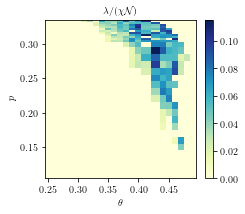

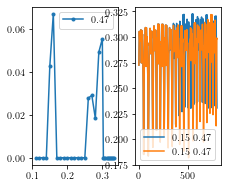

In [12]:
sys.path.append('/home/ricval/Documenti/Cavity_python/library')
import chaos
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.signal import argrelextrema

props = dict(boxstyle='round', facecolor='white', alpha=0.5)

horizonal_inset = False

results_dir = '/home/ricval/Documenti/Cavity_python/data_paper/SU3_Gaussian_swipe_p_theta_noise1E-8/'
plot_dir = '/home/ricval/Documenti/Cavity/DPT_SUn_paper/final_images'

L = 1
d = 3
W = 0

p_list = [0.01 * j for j in range(10)]
p_list += [0.1 + 0.01*j for j in range(10)]
p_list += [0.2 + 0.01*j for j in range(10)]
p_list += [0.3 + 0.001*j for j in range(34)]


for idx, p in enumerate(p_list):
    p_list[idx] = round(p,3)

height_images = 7.4
lyapunov_exponent_abs = True


fig, ax = plt.subplots(1,1,figsize=(cm2inch(width_images), cm2inch(height_images)))

ax.set_xlabel('$\\theta$')
ax.set_ylabel('$p$')
ax.set_title('$\lambda/(\chi\mathcal{{N}})$')

alpha_list = [round(0.25 + 0.01 * j,2) for j in range(26)]
# alpha_list = [0.46,0.47]
# alpha_list = alpha_list[::4]
# p_list = p_list[::4]
p_list = np.array(p_list)
p_list = p_list[p_list>0.1]
print(alpha_list)
matrix_lyapunov = []
alpha_exist = []
p_exist = []

alpha_plot = [0.47]
fig2, ax2 = plt.subplots(1,2,figsize=(cm2inch(width_images), cm2inch(height_images)))

for idx, alpha in enumerate(alpha_list):
    lyapunov_exponent  = []
    dlyapunov_exponent = []
    error_list = []
    p_exist_single_alpha = []
    for p in p_list:
        # print(f'{alpha} {p}')
        O = {}
        for i in range(d):
            for j in range(i+1,d):
                O[f's{i}{j}'] = []

        exist = 0
        for idx in range(12):
            folder = f'{results_dir}SUN_Gaussian_L{L}_alpha{alpha:.2f}_p{p:.3f}_W{W:.3f}_index{idx}'

            if os.path.isdir(folder):
                # if idx == 0:
                #     print(folder)

                exist += 1
                
                time = np.load(f'{folder}/timesteps.npy')
                index_t = time<10000

                time = time[index_t]

                for name in list(O.keys()):
                    if os.path.isfile(f'{folder}/{name}.npy'):
                        o = np.load(f'{folder}/{name}.npy')
                        O[name].append(o[index_t])

        if exist > 2:
            p_exist_single_alpha.append(p)
            l , t, dO , error = chaos.compute_average_lyapunov_exponent(O,time,max_dO=np.log(0.005),min_dO=-20,order=10,transient=0)
            lyapunov_exponent.append(l[0])
            dlyapunov_exponent.append(l[1])
            error_list.append(error)

    if idx == 0 or len(p_exist) == 0:
        p_exist = p_exist_single_alpha

    if len(lyapunov_exponent) > 0 and p_exist == p_exist_single_alpha:
        for idx , lyap in enumerate(lyapunov_exponent):
            if lyap < 1E-2:
                lyapunov_exponent[idx] = 0

        alpha_exist.append(alpha)
        matrix_lyapunov.append(lyapunov_exponent)
        if alpha in alpha_plot:
            ax2[0].plot(p_exist,lyapunov_exponent,label=f'{alpha}',marker='.')
            lyapunov_exponent = np.array(lyapunov_exponent)
            p_exist_array = np.array(p_exist)
            print(alpha)
            print(p_exist_array[lyapunov_exponent>1E-4])
            p_reg = p_exist_array[lyapunov_exponent<1E-4][-1]
            p_reg = 0.15
            for k in range(2):
                folder = f'{results_dir}SUN_Gaussian_L{L}_alpha{alpha:.2f}_p{p_reg:.3f}_W{W:.3f}_index{k}'

                if os.path.isdir(folder):
                    time = np.load(f'{folder}/timesteps.npy')
                    o = np.load(f'{folder}/s12.npy')
                    ax2[1].plot(time,np.abs(o),label=f'{p_reg} {alpha}')

matrix_lyapunov = np.array(matrix_lyapunov)

pcm = ax.pcolormesh(alpha_exist,p_exist,np.transpose(matrix_lyapunov)
                    # ,norm=LogNorm(vmin= 1E-2, vmax=1)
                    ,cmap="YlGnBu")
# ax2.legend()
for a in ax2:
    a.legend()
fig.colorbar(pcm, ax=ax,location='right')


# fig.savefig(f"{plot_dir}/lyapunov_exponent_and_dynamics_gaussian_state_L1_W0_swipe_p_v7_dO1E-8.pdf",bbox_inches='tight',pad_inches = 0)
plt.show()



### Fig. 5 - optimization plot in the $SU(3)$ case. We start from a spin-coherent state poiting in $(\theta,\phi) = (0.4\pi,0.5\pi)$ (n.b. with the new codes in Cavity_python it corresponds to $\theta=0.4\pi$, in the old one is $\theta=0.6\pi$)with $\theta$ the angle with $z$-axis and $\phi$ the angle with $x$-axis on the $xy$ plane. We set $\alpha=0.47$ ($g_1 = \sin(\alpha\pi)$ and $g_2=\cos(\alpha\pi)$). Disorder is $W=0.1$
#### Results where obtained in the old codes so the initial state is with $\theta=0.6\pi$

<ipython-input-7-3efe65d7a5e0>:80: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


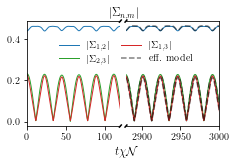

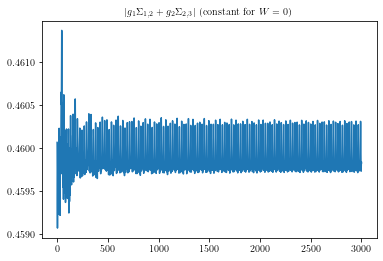

In [7]:
plot_dir = '/home/ricval/Documenti/Cavity/DPT_SUn_paper/final_images'
data_dir = '/home/ricval/Documenti/Cavity/Cavity_Python/Mean_Field_Bosons_In_Cavity/data_BiC/test/Fig_5_paper/SU3_spin_1_coherent_state_effective_reduction_opt_raw'

L = 10000
W_list = [0.10]
alpha = 0.47
W = 0.1
list_obs = ['S_m','S_p','S_x']#,'n1','nm1']
name_obs = ['$|\overline{\Sigma}_{1,2}|$','$|\overline{\Sigma}_{2,3}|$','$|\overline{\Sigma}_{1,3}|$']
name_obs = ['$|\Sigma_{1,2}|$','$|\Sigma_{2,3}|$','$|\Sigma_{1,3}|$']

color = ['tab:blue','tab:green','tab:red','tab:brown']
marker_list = ['v','o','^','D']
letter_list = ['(b)','(c)','(d)','(e)']

height_images = 7

# fig, ax = plt.subplots(1,2,sharex=False,sharey=True,figsize=(cm2inch(width_images), cm2inch(height_images)),constrained_layout=True)
fig, (ax1,ax2) = plt.subplots(1,2,sharex=False,sharey=True,figsize=(cm2inch(width_images), cm2inch(height_images)),constrained_layout=True)

ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.get_yaxis().set_visible(False)


folder = f'{data_dir}/MF_BiC_L{L}_omegaphoton1.00_alpha{alpha:.4f}_k0.00_hmean0.00_deltah{W:.2f}_qmean0.00_deltaq{W:.2f}_disorderTrue_realization_disorder1_M1.00_chiplus1.00_chiminus1.00_bosons_RWA_INDEX1_HTHETA0.6_HPHI0.5_DHTHETA0_DHPHI0'

Stot = 0

for idx , obs in enumerate(list_obs):
    
    name_file = f'{folder}/{obs}.npy'
    name_file_opt = f'{folder}/{obs}_opt.npy'

    time_file = f'{folder}/timesteps.npy'
    time_file_opt = f'{folder}/timesteps_opt.npy'

    if os.path.isfile(name_file):  
        O = np.load(name_file)
        t = np.load(time_file)

        
        ax1.plot(t,np.abs(O),label=f'$W/\chi={W:.2f}$',linewidth=linewidth,color=color[idx])
        ax2.plot(t,np.abs(O),label=f'{name_obs[idx]}',linewidth=linewidth,color=color[idx])

        if obs == 'S_m':
            Stot += np.sin(alpha*math.pi) * O
        elif obs == 'S_p':
            Stot += np.cos(alpha*math.pi) * O
       

    if W > 0 :
        if os.path.isfile(name_file_opt):
            O_opt = np.load(name_file_opt)
            t_opt = np.load(time_file_opt)
            if idx == 2:
                ax2.plot(t_opt,np.abs(O_opt),linestyle='--',color='black',alpha=0.5,linewidth=linewidth*1.5,label='eff. model')
            else:
                ax2.plot(t_opt,np.abs(O_opt),linestyle='--',color='black',alpha=0.5,linewidth=linewidth*1.5)




ax1.set_xlim([0,120])
ax2.set_xlim([2880,3000])

ax1.xaxis.set_ticks(np.arange(0, 120, 50 ))
ax2.xaxis.set_ticks(np.arange(2900, 3010, 50 ))
      

# ax2.legend(ncol=3, frameon=False,loc='lower center',bbox_to_anchor=(0, -0.60),handlelength=0.6,labelspacing=0.3,columnspacing=1)
ax2.legend(ncol=2, frameon=False,loc='lower center',bbox_to_anchor=(0, 0.50),labelspacing=0.3,columnspacing=1)

    


fig.supxlabel('$t\chi\mathcal{{N}}$',y=0.14,x=0.53)
fig.suptitle('$|\Sigma_{n,m}|$',x=0.53,y=0.9)

plt.tight_layout()

fig.subplots_adjust(wspace=0.06)
fig.subplots_adjust(bottom=0.3)


d = .01  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1-d, 1+d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax1.plot((1-d, 1+d), (- d, + d), **kwargs)  # bottom-left diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((- d, + d), (- d, + d), **kwargs)  # bottom-right diagonal


plt.savefig(f'{plot_dir}/SU3_exact_vs_single_body_reduced_alpha{alpha:.2f}_W{W:.2f}_v5.pdf',bbox_inches='tight',pad_inches = 0)

fig_2, ax_extra = plt.subplots(1,1)
ax_extra.plot(t,np.abs(Stot))
ax_extra.set_title('$|g_1 \Sigma_{{1,2}} + g_2 \Sigma_{{2,3}}|$ (constant for $W=0$)')

plt.show()

### Fig 6: $SU(4)$ vs $W$. Show the different dynamical phases accessible. The initial state is a gradient state with not-normalized bosonic amplitudes $(b_{-1},b_0,b_1,b_2) = (4,3,2,1)$. We fix $\alpha=0.36$ and $\alpha_2=0.20$ such that $g_1=\sin(\alpha\pi)\sin(\alpha_2\pi)$, $g_2=\cos(\alpha \pi) \sin(\alpha_2\pi)$ and $g_3=\cos(\alpha_2\pi)$. We have interesting phases for $W = \{0.01,0.09,0.35,2\}$ (respectively, Phase-IV, Phase-III, Phase-II, Phase-I)

/home/ricval/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/ricval/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/ricval/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/ricval/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/ricval/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


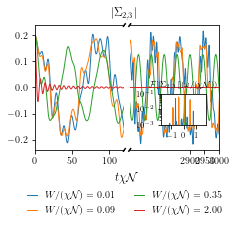

In [9]:

list_observable = ['S_m_abs']
list_observable = ['S_p_abs']

plot_dir = '/home/ricval/Documenti/Cavity/DPT_SUn_paper/final_images'
height_images = 8
fig, (ax1,ax2) = plt.subplots(1,2,sharex=False,sharey=True,figsize=(cm2inch(width_images), cm2inch(height_images)),constrained_layout=True)

ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.get_yaxis().set_visible(False)

ax_1 = ax2.inset_axes([0.35,0.20,0.5,0.25  ])
# ax_1 = ax1.inset_axes([0.6,0.20,0.5,0.25  ])

# GRADIENT STATE (alpha_2=0.20 , alpha=0.36)
# W=0 (phase-IV)
# W=0.09 (phase-III)
# W=0.35 (phase-II)
# W=2

############################################################



path = '/home/ricval/Documenti/Cavity/Cavity_Python/Mean_Field_Bosons_In_Cavity/data_BiC/test/Fig_3_paper'

L=10000
T=3000
omega_photon = 1
h_mean = 0
M = 1.00
htheta = 0.6
hphi = 0.5
name_prefix = ['SU4']
name_switch = 'delta_h'
alpha = 0.36
alpha_2 = 0.20

prefix_list = []
param_fixed_list = []
param_switch_list = []

for j in range(len(name_prefix)):

    prefix_list.append('{}_gradient_population'.format(name_prefix[j]))
    param = [
        ("L",L),
            ("omega_photon",omega_photon),
            ("h_mean",h_mean),
            ("q_mean",0),
            ("M",1),
             ("dphi",0),
             ("same_W",1),
            ("alpha",alpha),
            ("alpha_2",alpha_2),
             ('realization_disorder',1),
             ('HPHI',hphi),
            ('HTHETA',htheta),
            ('DHTHETA',0),
            ('DHPHI',0),
            ('dphi',0),
            ('evenly',1)
             ]
    param_fixed_list.append(param)
    param_switch_list.append([('{}'.format(name_switch),[0.01,0.09,0.35,2])])

#### do not modify

local_directory_list = []
csv_file_list = []

for prefix in prefix_list:
    local_directory_list.append('{}/{}'.format(path,prefix))
    csv_file_list.append('{}/{}/data_{}_processed.csv'.format(path,prefix,prefix))
    




for idx, name_obs in enumerate(list_observable):
    
    for j , prefix in enumerate(name_prefix):
        directory = local_directory_list[j]
        csv_file  = csv_file_list[j]
        param_switch = param_switch_list[j]
        time, obs, switch = data_management.get_obs_vs_time(directory,csv_file,param_fixed_list[j],param_switch,name_obs, False,False)

        for l in range(len(time)):
            start = int(len(time[l])/2)
            t = time[l][start:]
            O = obs[l][start:]
            
            dt = t[1]-t[0]
            N  = len(t)
            
            yf = fft(O)
            xf = fftfreq(N, dt)*2*math.pi

            index = np.argmax(np.abs(yf[1:N//2]))
            main_frequency = xf[index]
            if switch[l] in param_switch[0][1]:
                ax1.plot(time[l], obs[l], marker='.',markersize=0,label=f'$W/(\chi\mathcal{{N}})={switch[l]:.2f}$', linewidth=linewidth , linestyle='-',alpha=1)
                ax2.plot(time[l], obs[l], marker='.',markersize=0,label=f'$W/(\chi\mathcal{{N}})={switch[l]:.2f}$', linewidth=linewidth , linestyle='-',alpha=1)
                ax_1.plot(xf , 2.0/N * np.abs(yf), linestyle='-',linewidth=linewidth , alpha=1)



ax1.set_xlim([0,120])
ax2.set_xlim([2880,3000])
# ax2.set_xlim([288,2000])

ax1.xaxis.set_ticks(np.arange(0, 150, 50 ))
ax2.xaxis.set_ticks(np.arange(2900, 3010, 50 ))
ax1.legend(ncol=2,frameon=False,loc='lower center',bbox_to_anchor=(1, -0.6),handlelength=1)

fig.supxlabel('$t\chi\mathcal{{N}}$',y=0.15,x=0.53)
fig.suptitle('$|\Sigma_{2,3}|$',y=0.93,x=0.53)

ax_1.set_xlim([-1.8,1.8])
ax_1.set_ylim([1E-3,0.1])
ax_1.set_yscale('log')
# ax_1.set_xlabel('$\omega/(\chi\mathcal{{N}})$',fontsize=8)
ax_1.set_title('$\mathcal{F}[|\Sigma_{2,3}|](\omega/(\chi\mathcal{{N}}))$',fontsize=8)
# ax_1.xaxis.set_ticks([0,1])
ax_1.tick_params(axis='both', which='major', labelsize=8)
ax_1.tick_params(axis='both', which='minor', labelsize=8)




# axs[1].set_xlabel('$\omega$')

# axs[0].set_title('$\overline{\Sigma}_{2,1}(t)$',fontsize=11)
# axs[1].set_title('$\mathcal{F}[\overline{\Sigma}_{2,1}(t)](\omega)$',fontsize=11)
# axs[1].yaxis.tick_right()

plt.tight_layout()

fig.subplots_adjust(wspace=0.06)
fig.subplots_adjust(bottom=0.3)


d = .01  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1-d, 1+d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax1.plot((1-d, 1+d), (- d, + d), **kwargs)  # bottom-left diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((- d, + d), (- d, + d), **kwargs)  # bottom-right diagonal

# plt.savefig(f'{plot_dir}/dynamics_and_fourier_SU4_swipe_W_v2.pdf',bbox_inches='tight',pad_inches = 0)

### Fig 7: Lyapunov exponent for $p=1/3$ as a function of disorder $W$. Simulations obtained from Gaussian states. The states are given by the superposition $|\psi_j\rangle = (|\gamma_1\rangle + |\gamma_2\rangle) / \sqrt{2}$ with $\gamma_1 = (\sqrt{1/3+p},\sqrt{1/3},\sqrt{1/3-p})$ and $\gamma_2 = (\sqrt{1/3},\sqrt{1/3-p},\sqrt{1/3+p})$ with $p=1/3$. We set $\alpha=0.36$ such that $g_1 = \sin(\alpha\pi)$ and $g_2 =\cos(\alpha\pi)$.


/home/ricval/Documenti/Cavity_python/lyapunov_gaussian_states_swipe_W_v2/SUN_Gaussian_L1_W0.000_index0
/home/ricval/Documenti/Cavity_python/lyapunov_gaussian_states_swipe_W_v2/SUN_Gaussian_L10000_W0.010_index0
/home/ricval/Documenti/Cavity_python/lyapunov_gaussian_states_swipe_W_v2/SUN_Gaussian_L10000_W0.020_index0
/home/ricval/Documenti/Cavity_python/lyapunov_gaussian_states_swipe_W_v2/SUN_Gaussian_L10000_W0.030_index0
/home/ricval/Documenti/Cavity_python/lyapunov_gaussian_states_swipe_W_v2/SUN_Gaussian_L10000_W0.040_index0
/home/ricval/Documenti/Cavity_python/lyapunov_gaussian_states_swipe_W_v2/SUN_Gaussian_L10000_W0.050_index0
/home/ricval/Documenti/Cavity_python/lyapunov_gaussian_states_swipe_W_v2/SUN_Gaussian_L10000_W0.060_index0
/home/ricval/Documenti/Cavity_python/lyapunov_gaussian_states_swipe_W_v2/SUN_Gaussian_L10000_W0.070_index0
/home/ricval/Documenti/Cavity_python/lyapunov_gaussian_states_swipe_W_v2/SUN_Gaussian_L10000_W0.090_index0
/home/ricval/Documenti/Cavity_python/lyap

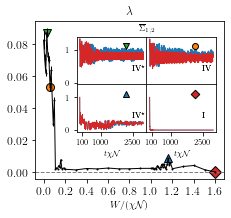

In [93]:
import sys
sys.path.append(f'/home/ricval/Documenti/Cavity_python/library')
import chaos

plot_dir = '/home/ricval/Documenti/Cavity/DPT_SUn_paper/final_images/'

height_images = 7.4
x_1 = 0.22
y_1 = 0.6
width = 0.37
height = 0.3

results_dir = '/home/ricval/Documenti/Cavity_python/lyapunov_gaussian_states_swipe_W_v2/'


symbol = ['v','o','^','D']
style = ['-','-','dotted']
color = ['tab:blue','tab:red']
color_marker = ['tab:green','tab:orange','tab:blue','tab:red']
text = ["IV${{}}^\star$","IV","IV${{}}^\star$","I"]

json_file = ""

name_swipe = "W"
L = 10000
d = 3

W_list = [j * 0.01 for j in range(170)]
W_list = np.round(np.array(W_list),2)
W_plot = [0.03,0.4,1.16,1.6]

fig, ax = plt.subplots(1,1,figsize=(cm2inch(width_images), cm2inch(height_images)))
ax.set_xlabel('$W/(\chi\mathcal{{N}})$')
ax.set_title('$\lambda$')

# insets position 
# ax_1 | ax_2
# ax_3 | ax_4

ax_1 = ax.inset_axes([x_1 , y_1 , width, height])
ax_2 = ax.inset_axes([x_1 + width , y_1 , width, height])
ax_3 = ax.inset_axes([x_1 , y_1 - height , width, height])
ax_4 = ax.inset_axes([x_1 + width , y_1 - height , width, height])

ax_1.get_xaxis().set_visible(False)
ax_2.get_xaxis().set_visible(False)
ax_2.get_yaxis().set_visible(False)
ax_4.get_yaxis().set_visible(False)

ax_1.set_title('$\overline{\Sigma}_{{1,2}}$',x=1,fontsize=8)

for a in [ax_3,ax_4]:   
    a.set_xlabel('$t\chi\mathcal{{N}}$',fontsize=8)

ax_inset = [ax_1,ax_2,ax_3,ax_4]
for a in ax_inset:
    a.tick_params(axis='both', which='major', labelsize=8)
    a.tick_params(axis='both', which='minor', labelsize=8)
    a.set_ylim([-0.05,1.4])


lyapunov_exponent = []
dlyapunov_exponent = []
W_exist = []

for W in W_list:

    O = {}
    for i in range(d):
        for j in range(i+1,d):
            O[f's{i}{j}'] = []

    exist = 0
    for idx in range(12):
        if W == 0:
            folder = f'{results_dir}SUN_Gaussian_L1_W{W:.3f}_index{idx}'
        else:
            folder = f'{results_dir}SUN_Gaussian_L{L}_W{W:.3f}_index{idx}'

        if os.path.isdir(folder):
            if idx == 0:
                print(folder)

            for name in list(O.keys()):
                if os.path.isfile(f'{folder}/{name}.npy'):
                    O[name].append(np.load(f'{folder}/{name}.npy'))
            time = np.load(f'{folder}/timesteps.npy')

            if W in W_plot and idx < 2:
                ax_inset[W_plot.index(W)].plot(time,O['s01'][-1]/O['s01'][-1][0],linewidth=0.8,linestyle=style[idx],color=color[idx])
                x_text = 0.8
                y_text = 0.3
                # if W_plot.index(W) == 0:
                #     y_text = 0.2
                # elif W_plot.index(W) == 1:
                #     y_text  = 0.7
                # elif W_plot.index(W) == 2:
                #     y_text  = 0.5
                
                # ax[W_plot.index(W)].text(x_text,y_text, f'$W/\chi={W:.2f}$ ({text[W_plot.index(W)]})', transform=ax[W_plot.index(W)].transAxes, size=6)
                ax_inset[W_plot.index(W)].text(x_text,y_text, f'{text[W_plot.index(W)]}', transform=ax_inset[W_plot.index(W)].transAxes, size=8)

            
            exist += 1
        

    if exist > 2:
        W_exist.append(round(W,2))
        l , t,  dO = chaos.compute_lyapunov_exponent(O,time,max_dO=1E-3,order=1)
        lyapunov_exponent.append(l[0])
        dlyapunov_exponent.append(l[1])


xmin , xmax = ax_1.get_xlim()
ymin , ymax = ax_1.get_ylim()

for idx, a in enumerate(ax_inset):
    x = xmin + 0.7*(xmax-xmin)
    y = ymax - 0.2*(ymax-ymin)
    a.scatter(x,y,marker=symbol[idx],color=color_marker[idx],linewidths=1,edgecolors='black',zorder=2)

ax_3.set_xticks([100,1000,2500])
ax_4.set_xticks([100,1000,2500])

print(W_exist)

for idx, l in enumerate(lyapunov_exponent):
    if l < 0.001:
        lyapunov_exponent[idx] = 0

for idx, w in enumerate(W_plot):
    ax.plot(w,lyapunov_exponent[W_exist.index(w)],marker=symbol[idx],color=color_marker[idx],markersize=8,markeredgewidth=1,markeredgecolor='black')

ax.axhline(y=0, color='grey', linestyle='--',linewidth=linewidth)
ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6])

ax.errorbar(W_exist,lyapunov_exponent,yerr=dlyapunov_exponent,linestyle='-',color='black',linewidth=linewidth,marker='.',markersize=2)
# fig_l.savefig(f"lyapunov_exponent_gaussian_state_L{L}_swipe_W.pdf",bbox_inches='tight',pad_inches = 0)

fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=0)

# fig.savefig(f"{plot_dir}lyapunov_exponent_and_dynamics_gaussian_state_L{L}_p1_3_swipe_W_v2.pdf",bbox_inches='tight',pad_inches = 0)
plt.show()



### Fig.7 - different value of $p$. Same algorithm

0.0 12
0.01 12
0.02 12
0.03 12
0.04 12
0.05 12
0.06 12
0.07 12
0.08 12
0.09 12
0.1 12
0.11 12
0.12 12
0.13 12
0.14 12
0.15 12
0.16 12
0.17 12
0.18 12
0.19 12
0.2 12
0.21 0
0.22 12
0.23 0
0.24 12
0.25 0
0.26 12
0.27 0
0.28 12
0.29 0
0.3 12
0.31 0
0.32 0
0.33 0
0.34 0
0.35 0
0.36 0
0.37 0
0.38 0
0.39 0
0.4 12
0.41 0
0.42 0
0.43 0
0.44 0
0.45 0
0.46 0
0.47 0
0.48 0
0.49 0
0.5 12
0.51 0
0.52 0
0.53 0
0.54 0
0.55 0
0.56 0
0.57 0
0.58 0
0.59 0
0.6 12
0.61 0
0.62 0
0.63 0
0.64 0
0.65 0
0.66 0
0.67 0
0.68 0
0.69 0
0.7 12
0.71 0
0.72 0
0.73 0
0.74 0
0.75 0
0.76 0
0.77 0
0.78 0
0.79 0
0.8 12
0.81 0
0.82 0
0.83 0
0.84 0
0.85 0
0.86 0
0.87 0
0.88 0
0.89 0
0.9 12
0.91 0
0.92 0
0.93 0
0.94 0
0.95 0
0.96 0
0.97 0
0.98 0
0.99 0
1.0 12
1.01 0
1.02 12
1.03 0
1.04 12
1.05 0
1.06 12
1.07 0
1.08 12
1.09 0
1.1 12
1.11 0
1.12 12
1.13 0
1.14 12
1.15 0
1.16 12
1.17 0
1.18 12
1.19 0
1.2 12
1.21 0
1.22 0
1.23 0
1.24 0
1.25 0
1.26 0
1.27 0
1.28 0
1.29 0
1.3 12
1.31 0
1.32 0
1.33 0
1.34 0
1.35 0
1.36 0
1.37 0
1.38

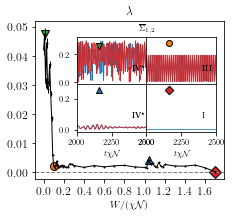

In [233]:
import sys
sys.path.append(f'/home/ricval/Documenti/Cavity_python/library')
import chaos
name_obs = 's02'
plot_dir = '/home/ricval/Documenti/Cavity/DPT_SUn_paper/final_images/'
p = 0.320
height_images = 7.4
x_1 = 0.22
y_1 = 0.6
width = 0.37
height = 0.3

results_dir = '/home/ricval/Documenti/Cavity_python/lyapunov_gaussian_states_swipe_W_v2/'
results_dir = '/home/ricval/Documenti/Cavity_python/data_paper/SU3_Gaussian_p_vs_W/'

folder = f'{main_dir}SUN_Gaussian_L{L}_p{p:.3f}_W{W:.3f}_index{idx}'


symbol = ['v','o','^','D']
style = ['-','-','-','dotted']
color = ['tab:blue','tab:red','tab:orange']
color_marker = ['tab:green','tab:orange','tab:blue','tab:red']
text = ["IV${{}}^\star$","IV","IV${{}}^\star$","I"]
text = ["IV${{}}^\star$","III","IV${{}}^\star$","I"]

json_file = ""

name_swipe = "W"
L = 10000
d = 3

W_list = [j * 0.01 for j in range(200)]
W_list = np.round(np.array(W_list),2)
W_plot = [0.02,0.08,0.1,1.7]
W_plot = [0.01,0.1,1.04,1.7]
# W_plot = [1.11,1.12,1.13,1.14]

fig, ax = plt.subplots(1,1,figsize=(cm2inch(width_images), cm2inch(height_images)))
ax.set_xlabel('$W/(\chi\mathcal{{N}})$')
ax.set_title('$\lambda$')

# insets position 
# ax_1 | ax_2
# ax_3 | ax_4

ax_1 = ax.inset_axes([x_1 , y_1 , width, height])
ax_2 = ax.inset_axes([x_1 + width , y_1 , width, height])
ax_3 = ax.inset_axes([x_1 , y_1 - height , width, height])
ax_4 = ax.inset_axes([x_1 + width , y_1 - height , width, height])

ax_1.get_xaxis().set_visible(False)
ax_2.get_xaxis().set_visible(False)
ax_2.get_yaxis().set_visible(False)
ax_4.get_yaxis().set_visible(False)

ax_1.set_title('$\overline{\Sigma}_{{1,2}}$',x=1,fontsize=8)

for a in [ax_3,ax_4]:   
    a.set_xlabel('$t\chi\mathcal{{N}}$',fontsize=8)

ax_inset = [ax_1,ax_2,ax_3,ax_4]
for a in ax_inset:
    a.tick_params(axis='both', which='major', labelsize=8)
    a.tick_params(axis='both', which='minor', labelsize=8)
    # a.set_ylim([-0.05,1.4])


lyapunov_exponent = []
dlyapunov_exponent = []
W_exist = []

for W in W_list:

    O = {}
    for i in range(d):
        for j in range(i+1,d):
            O[f's{i}{j}'] = []

    exist = 0
    for idx in range(12):
        # if W == 0:
        #     folder = f'{results_dir}SUN_Gaussian_L1_p{p:.3f}_W{W:.3f}_index{idx}'
        # else:
        folder = f'{results_dir}SUN_Gaussian_L{L}_p{p:.3f}_W{W:.3f}_index{idx}'
        if os.path.isdir(folder):
            # if idx == 0:
            #     print(folder)
            time = np.load(f'{folder}/timesteps.npy')
            # time = time[time<2000]
            
            for name in list(O.keys()):
                if os.path.isfile(f'{folder}/{name}.npy'):
                    O[name].append(np.load(f'{folder}/{name}.npy'))
                    O[name][-1] = O[name][-1][:len(time)]
            if W in W_plot and idx < 2:
                ax_inset[W_plot.index(W)].plot(time,O[name_obs][-1],linewidth=0.8,linestyle=style[idx],color=color[idx])
                x_text = 0.8
                y_text = 0.3
                # if W_plot.index(W) == 0:
                #     y_text = 0.2
                # elif W_plot.index(W) == 1:
                #     y_text  = 0.7
                # elif W_plot.index(W) == 2:
                #     y_text  = 0.5
                
                # ax[W_plot.index(W)].text(x_text,y_text, f'$W/\chi={W:.2f}$ ({text[W_plot.index(W)]})', transform=ax[W_plot.index(W)].transAxes, size=6)
                ax_inset[W_plot.index(W)].text(x_text,y_text, f'{text[W_plot.index(W)]}', transform=ax_inset[W_plot.index(W)].transAxes, size=8)

            
            exist += 1
        
    print(f'{W} {exist}')
    if exist > 2:
        W_exist.append(round(W,2))
        l , t,  dO = chaos.compute_lyapunov_exponent(O,time,max_dO=1E-3,order=1)
        lyapunov_exponent.append(l[0])
        dlyapunov_exponent.append(l[1])


xmin , xmax = ax_1.get_xlim()
ymin , ymax = ax_1.get_ylim()

for idx, a in enumerate(ax_inset):
    x = xmin + 0.7*(xmax-xmin)
    y = ymax - 0.2*(ymax-ymin)
    a.scatter(x,y,marker=symbol[idx],color=color_marker[idx],linewidths=1,edgecolors='black',zorder=2)

# ax_3.set_xticks([100,1000,2500])
# ax_4.set_xticks([100,1000,2500])

for a in ax_inset:
    a.set_xlim([2000,2500])

print(W_exist)

W_exist += [1.7]
lyapunov_exponent += [0]
dlyapunov_exponent += [0]
for idx, l in enumerate(lyapunov_exponent):
    if l < 0.001:
        lyapunov_exponent[idx] = 0

for idx, w in enumerate(W_plot):
    if w in W_exist:
        ax.plot(w,lyapunov_exponent[W_exist.index(w)],marker=symbol[idx],color=color_marker[idx],markersize=8,markeredgewidth=1,markeredgecolor='black')

ax.axhline(y=0, color='grey', linestyle='--',linewidth=linewidth)
ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6])

ax.errorbar(W_exist,lyapunov_exponent,yerr=dlyapunov_exponent,linestyle='-',color='black',linewidth=linewidth,marker='.',markersize=2)
# fig_l.savefig(f"lyapunov_exponent_gaussian_state_L{L}_swipe_W.pdf",bbox_inches='tight',pad_inches = 0)

fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=0)

fig.savefig(f"{plot_dir}lyapunov_exponent_and_dynamics_gaussian_state_L{L}_p{p:.3f}_swipe_W_v3.pdf",bbox_inches='tight',pad_inches = 0)
plt.show()



### Fig. 7 - as above, but with horizontal plots. We do not show the additional Phase-IV*.

In [91]:
import sys
import nolds
from scipy.signal import argrelextrema

sys.path.append(f'/home/ricval/Documenti/Cavity_python/library')
import chaos
name_obs = 's02'
plot_dir = '/home/ricval/Documenti/Cavity/DPT_SUn_paper/final_images/'
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
p = 0.320
height_images = 9.6
height_images = 8
x_1 = 0.22
y_1 = 0.7
width = 0.35
height = 0.2
font_size = 8
# log x-scale

width = 0.23
height = 0.16
x_1 = 1-width*2-0.05
y_1 = 0.75
font_size = 6
# width = 0
# height = 0

results_dir = '/home/ricval/Documenti/Cavity_python/lyapunov_gaussian_states_swipe_W_v2/'
results_dir = '/home/ricval/Documenti/Cavity_python/data_paper/SU3_Gaussian_p_vs_W/'
results_dir = '/home/ricval/Documenti/Cavity_python/data_paper/SU3_Gaussian_swipe_p_and_W_noise1E-8/'
# results_dir = '/home/ricval/Documenti/Cavity_python/data_paper/SU3_Gaussian_swipe_p_and_W/'



symbol = ['v','o','^','D']
style = ['--','dashdot','-','dotted']
color = ['tab:orange','tab:blue','tab:red']
color_marker = ['tab:green','tab:orange','tab:blue','tab:red']
text = ["IV${{}}^\star$","IV","IV${{}}^\star$","I"]
text = ["IV${{}}^\star$","IV","I","I"]

json_file = ""

name_swipe = "W"
L = 50000
d = 3

W_list = [j * 0.01 for j in range(1,200)]
W_list = np.round(np.array(W_list),2)
W_plot = [0.02,0.08,0.1,1.7]
W_plot = [0.01,0.1,1.04,1.7]
W_plot = [0.01,0.1,0.5]
W_plot = [0.2,1.10,1.12,1.14,1.16]
W_plot = [0.01,0.4,1.7]

W_plot = [1.11,1.12,1.13]
W_plot = [0.01,0.2,1.7]
W_plot = [0.01,0.02,0.04]
W_plot = [0.04,0.05,0.06]
# W_plot = [0.01,0.02,0.03]

fig, ax = plt.subplots(1,1,figsize=(cm2inch(width_images), cm2inch(height_images)))
ax.set_xlabel('$W/(\chi\mathcal{{N}})$')
ax.set_title('$\lambda/(\chi\mathcal{{N}})$')

fig_fourier , ax_Fourier = plt.subplots(1,len(W_plot),figsize=(cm2inch(14), cm2inch(5)))

# insets position 
# ax_1 | ax_2
# ax_3 | ax_4

ax_1 = ax.inset_axes([x_1 , y_1 , width, height])
ax_2 = ax.inset_axes([x_1 + width +0.03 , y_1 , width, height])
ax_3 = ax.inset_axes([x_1 , y_1 - height , width, height])
ax_4 = ax.inset_axes([x_1 + width +0.03, y_1 - height , width, height])
ax_5 = ax.inset_axes([x_1 , y_1 - 2*height , width, height])
ax_6 = ax.inset_axes([x_1 + width +0.03, y_1 - 2*height , width, height])

ax_1.get_xaxis().set_visible(False)
ax_2.get_xaxis().set_visible(False)
ax_3.get_xaxis().set_visible(False)
ax_4.get_xaxis().set_visible(False)

ax_2.get_yaxis().set_visible(False)
ax_4.get_yaxis().set_visible(False)
ax_6.get_yaxis().set_visible(False)

ax_1.set_title('$\Sigma_{{1,3}}$',x=1,fontsize=8)

for a in [ax_5]:   
    a.set_xlabel('$t\chi\mathcal{{N}}$',fontsize=8,x=1)

ax_inset = [ax_1,ax_2,ax_3,ax_4,ax_5,ax_6]
for a in ax_inset:
    a.tick_params(axis='both', which='major', labelsize=8)
    a.tick_params(axis='both', which='minor', labelsize=8)

for a in [ax_1,ax_3,ax_5]:
    a.spines['right'].set_visible(False)
for a in [ax_2,ax_4,ax_6]:
    a.spines['left'].set_visible(False)
    a.get_yaxis().set_visible(False)

lyapunov_exponent = []
dlyapunov_exponent = []
W_exist = []

for W in W_list:

    O = {}
    for i in range(d):
        for j in range(i+1,d):
            O[f's{i}{j}'] = []

    

    exist = 0
    for idx in range(12):
        # if W == 0:
        #     folder = f'{results_dir}SUN_Gaussian_L1_p{p:.3f}_W{W:.3f}_index{idx}'
        # else:
        folder = f'{results_dir}SUN_Gaussian_L{L}_p{p:.3f}_W{W:.3f}_index{idx}'
        if os.path.isdir(folder):
            # if idx == 0:
            #     print(folder)
            time = np.load(f'{folder}/timesteps.npy')
            # time = time[time<1300]
            # time = time[time<500]
            max_time = time[-1]
            
            for name in list(O.keys()):
                if os.path.isfile(f'{folder}/{name}.npy'):
                    O[name].append(np.load(f'{folder}/{name}.npy'))
                    O[name][-1] = O[name][-1][:len(time)]
                    # print(O[name][-1][-1])

            

            if W in W_plot and idx < 3:
                ax_inset[W_plot.index(W)*2].plot(time,np.abs(O[name_obs][-1]),linewidth=0.8,linestyle=style[idx],color=color[idx])
                ax_inset[W_plot.index(W)*2+1].plot(time,np.abs(O[name_obs][-1]),linewidth=0.8,linestyle=style[idx],color=color[idx])

                x_text = 0.7
                y_text = 0.7
                # if W_plot.index(W) == 0:
                #     y_text = 0.2
                # elif W_plot.index(W) == 1:
                #     y_text  = 0.7
                # elif W_plot.index(W) == 2:
                #     y_text  = 0.5
                
                # ax[W_plot.index(W)].text(x_text,y_text, f'$W/\chi={W:.2f}$ ({text[W_plot.index(W)]})', transform=ax[W_plot.index(W)].transAxes, size=6)
                ax_inset[W_plot.index(W)*2+1].text(x_text,y_text, f'{text[W_plot.index(W)]}', transform=ax_inset[W_plot.index(W)*2+1].transAxes,  bbox=props, size=font_size)
                
                if idx == 0:

                    start = int(len(time)*0.6)
                    dt = time[1] - time[0]

                    N  = len(time[start:])
                    xf = fftfreq(N, dt)*2*math.pi
                    xf = xf


                    for name in list(O.keys()):
                        if len(O[name]) > 0:
                            yf = fft(np.abs(O[name][-1][start:]))
                            yf = yf

                            if name == name_obs:

                                ax_Fourier[W_plot.index(W)].plot(xf,2.0/N *np.abs(yf),label=f'{name}')
                    ax_Fourier[W_plot.index(W)].set_title(f'{W:.2f}')
            
            exist += 1
    # for name in list(O.keys()):
    #     if len(O[name]) == 0:
    #         O.pop[name]
# #################################################################################
#             lyapunov_exponent_temp = [] 
#             for name in list(O.keys()):
#                 lyapunov_exponent_temp.append(nolds.lyap_r(O[name][-1] , tau = time[1]-time[0] ,debug_plot=False))


#     if exist > 0:
#         W_exist.append(round(W,2))
#         # l , t,  dO = chaos.compute_lyapunov_exponent(O,time,max_dO=1E-3,order=1)
#         lyapunov_exponent.append(max(lyapunov_exponent_temp))
#         dlyapunov_exponent.append(0)

#################################################################################      
    if exist > 2:
        W_exist.append(round(W,2))
        # l , t,  dO = chaos.compute_lyapunov_exponent(O,time,max_dO=1E-3,order=1)
        # lyapunov_exponent.append(l[0])
        # dlyapunov_exponent.append(l[1])

        l , t, dO , error = chaos.compute_average_lyapunov_exponent(O,time,max_dO=-3,min_dO=-10,order=10)
        lyapunov_exponent.append(l[0])
        dlyapunov_exponent.append(l[1])

        if W in W_plot:
            fig_dO , ax_dO = plt.subplots(1,1,figsize=(15,6))   
            ax_dO.plot(t,dO[0])
            # ax_dO.set_yscale('log')
            # ax_dO.set_xscale('log')

            
        #     for index, name in enumerate(list(dO.keys())):
        #         dO_av = np.exp(np.average(dO[name],axis=0))

        #         k = argrelextrema(dO_av, np.greater,order=10)[0]
                
        #         ax_dO[index].plot(t[1:],np.array(dO_av))        

        #         dO_av = dO_av[k]
        #         t_ = t[k]

        #         k = dO_av < 1E-2
        #         dO_av = dO_av[k]
        #         t_ = t_[k]


        #         ax_dO[index].plot(t_,np.array(dO_av))
        #         ax_dO[index].set_title(f'lyapu {name} (W={W})')
            # for a in ax_dO:
            #     a.set_yscale('log')
            #     a.set_xscale('log')


for a in ax_Fourier:
    a.legend()
    # a.set_xlim([-2,2])
    a.set_xlim([-0.75,0.75])

    a.set_ylim([1E-2,0.03])
    # a.set_yscale('log')


for a in [ax_1,ax_3,ax_5]:
    # a.set_xlim([0,350])
    a.set_xticks([100,250])
    # a.set_xlim([0,100])
    # a.set_xticks([40,80])

   
for a in [ax_2,ax_4,ax_6]:
    a.set_xlim([1100,1300])
    a.set_xticks([1150,1250])

    # a.set_xlim([time[-1]-300,time[-1]])
    # a.set_xticks([1150,1250])

    # a.set_xlim([time[-1],800])
    # a.set_xticks([720,760])

    # a.set_xlim([2700,3000])

xmin , xmax = ax_1.get_xlim()
ymin , ymax = ax_2.get_ylim()

for a in [ax_1,ax_3,ax_5]:
    a.set_yticks([0,0.2])

for idx, a in enumerate([ax_1,ax_3,ax_5]):
    x = xmin + 0.3*(xmax-xmin)
    y = ymax - 0.3*(ymax-ymin)
    # y = ymin + 0.2*(ymax-ymin)
    print(x)
    print(y)
    a.scatter(x,y,marker=symbol[idx],color=color_marker[idx],linewidths=1,edgecolors='black',zorder=2)


 
# ax_3.set_xticks([100,1000,2500])
# ax_4.set_xticks([100,1000,2500])

# for a in ax_inset:
#     a.set_xlim([2000,2500])

print(W_exist)

# W_exist += [1.7]
# lyapunov_exponent += [0]
# dlyapunov_exponent += [0]
for idx, l in enumerate(lyapunov_exponent):
    if l < 0.008:
        lyapunov_exponent[idx] = 0

# for idx, l in enumerate(lyapunov_exponent):
#     if l < 1/time[-1]:
#         lyapunov_exponent[idx] = 0

for idx, w in enumerate(W_plot):
    if w in W_exist:
        ax.plot(w,lyapunov_exponent[W_exist.index(w)],marker=symbol[idx],color=color_marker[idx],markersize=8,markeredgewidth=1,markeredgecolor='black')
print(lyapunov_exponent)

ax.axhline(y=0, color='grey', linestyle='--',linewidth=linewidth)
# ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6])
ax.set_xticks([0,0.4,0.8,1.2,1.6])
ax.set_xscale('log')
ax.errorbar(W_exist,lyapunov_exponent,yerr=dlyapunov_exponent,linestyle='-',color='black',linewidth=linewidth,marker='.',markersize=2)
# fig_l.savefig(f"lyapunov_exponent_gaussian_state_L{L}_swipe_W.pdf",bbox_inches='tight',pad_inches = 0)

# fig.subplots_adjust(wspace=0)
# fig.subplots_adjust(hspace=0)

# plt.show()
fig.subplots_adjust(wspace=0.06)
fig.subplots_adjust(bottom=0.3)


d = .01  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax_1.transAxes, color='k', clip_on=False)
ax_1.plot((1-d, 1+d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax_1.plot((1-d, 1+d), (- d, + d), **kwargs)  # bottom-left diagonal

kwargs.update(transform=ax_2.transAxes)  # switch to the bottom axes
ax_2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax_2.plot((- d, + d), (- d, + d), **kwargs)  # bottom-right diagonal

kwargs = dict(transform=ax_3.transAxes, color='k', clip_on=False)
ax_3.plot((1-d, 1+d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax_3.plot((1-d, 1+d), (- d, + d), **kwargs)  # bottom-left diagonal

kwargs.update(transform=ax_4.transAxes)  # switch to the bottom axes
ax_4.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax_4.plot((- d, + d), (- d, + d), **kwargs)  # bottom-right diagonal


kwargs = dict(transform=ax_5.transAxes, color='k', clip_on=False)
ax_5.plot((1-d, 1+d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax_5.plot((1-d, 1+d), (- d, + d), **kwargs)  # bottom-left diagonal

kwargs.update(transform=ax_6.transAxes)  # switch to the bottom axes
ax_6.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax_6.plot((- d, + d), (- d, + d), **kwargs)  # bottom-right diagonal

# fig.savefig(f"{plot_dir}lyapunov_exponent_and_dynamics_gaussian_state_L{L}_p{p:.3f}_{name_obs}_swipe_W_log_scale_v3.pdf",bbox_inches='tight',pad_inches = 0)
# fig_fourier.savefig(f"{plot_dir}gaussian_state_L{L}_p{p:.3f}_swipe_W_FOURIER.pdf",bbox_inches='tight',pad_inches = 0)
plt.tight_layout()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


75.0
0.7
75.0
0.7
75.0
0.7
[]
[]


ValueError: Data has no positive values, and therefore can not be log-scaled.

### Scaling analysis in $L$ for the plots above. I want to see if chaos is pushed at longer times as $L$ increases.

/home/ricval/.local/lib/python3.8/site-packages/numpy/core/_methods.py:43: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/ricval/.local/lib/python3.8/site-packages/numpy/core/_methods.py:39: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


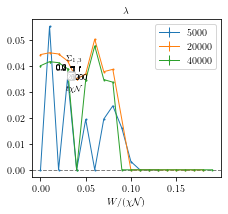

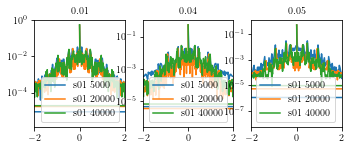

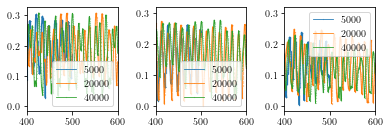

In [11]:
import sys
import nolds
sys.path.append(f'/home/ricval/Documenti/Cavity_python/library')
import chaos
name_obs = 's02'
plot_dir = '/home/ricval/Documenti/Cavity/DPT_SUn_paper/final_images/'
props = dict(boxstyle='round', facecolor='white', alpha=0.5)

L_list = [5000,20000,40000]

p = 0.320
alpha = 0.36
height_images = 9.6
x_1 = 0.22
y_1 = 0.7
width = 0.001
height = 0.001
# width = 0.35
# height = 0.2


results_dir = '/home/ricval/Documenti/Cavity_python/lyapunov_gaussian_states_swipe_W_v2/'
results_dir = '/home/ricval/Documenti/Cavity_python/data_paper/SU3_Gaussian_p_vs_W/'
results_dir = '/home/ricval/Documenti/Cavity_python/data_paper/SU3_Gaussian_swipe_p_and_W_noise1E-5/'



symbol = ['v','o','^','D']
style = ['-','-','-','dotted']
color = ['tab:blue','tab:red','tab:orange']
color_marker = ['tab:green','tab:orange','tab:blue','tab:red']
text = ["IV${{}}^\star$","IV","IV${{}}^\star$","I"]
text = ["IV${{}}^\star$","III","IV","I"]

json_file = ""

name_swipe = "W"
d = 3

W_list = [j * 0.01 for j in range(20)]
W_list = np.round(np.array(W_list),2)

W_plot = [0.1,0.5,1.1]
W_plot = [0.01,0.04,0.05]

fig, ax = plt.subplots(1,1,figsize=(cm2inch(width_images), cm2inch(height_images)))
ax.set_xlabel('$W/(\chi\mathcal{{N}})$')
ax.set_title('$\lambda$')

fig_fourier , ax_Fourier = plt.subplots(1,len(W_plot),figsize=(cm2inch(14), cm2inch(5)))
fig_dyn , ax_dyn = plt.subplots(1,len(W_plot),figsize=(cm2inch(14), cm2inch(5)))

# insets position 
# ax_1 | ax_2
# ax_3 | ax_4

ax_1 = ax.inset_axes([x_1 , y_1 , width, height])
ax_2 = ax.inset_axes([x_1 + width +0.03 , y_1 , width, height])
ax_3 = ax.inset_axes([x_1 , y_1 - height , width, height])
ax_4 = ax.inset_axes([x_1 + width +0.03, y_1 - height , width, height])
ax_5 = ax.inset_axes([x_1 , y_1 - 2*height , width, height])
ax_6 = ax.inset_axes([x_1 + width +0.03, y_1 - 2*height , width, height])

ax_1.get_xaxis().set_visible(False)
ax_2.get_xaxis().set_visible(False)
ax_3.get_xaxis().set_visible(False)
ax_4.get_xaxis().set_visible(False)

ax_2.get_yaxis().set_visible(False)
ax_4.get_yaxis().set_visible(False)
ax_6.get_yaxis().set_visible(False)

ax_1.set_title('$\Sigma_{{1,3}}$',x=1,fontsize=8)

for a in [ax_5]:   
    a.set_xlabel('$t\chi\mathcal{{N}}$',fontsize=8,x=1)

ax_inset = [ax_1,ax_2,ax_3,ax_4,ax_5,ax_6]
for a in ax_inset:
    a.tick_params(axis='both', which='major', labelsize=8)
    a.tick_params(axis='both', which='minor', labelsize=8)

for a in [ax_1,ax_3,ax_5]:
    a.spines['right'].set_visible(False)
for a in [ax_2,ax_4,ax_6]:
    a.spines['left'].set_visible(False)
    a.get_yaxis().set_visible(False)


for L in L_list:
    lyapunov_exponent = []
    dlyapunov_exponent = []
    W_exist = []

    for W in W_list:

        O = {}
        for i in range(d):
            for j in range(i+1,d):
                O[f's{i}{j}'] = []

        exist = 0
        for idx in range(12):

            folder = f'{results_dir}SUN_Gaussian_L{L}_p{p:.3f}_W{W:.3f}_index{idx}'
            if not os.path.isdir(folder):
                folder = f'{results_dir}SUN_Gaussian_L{L}_alpha{alpha:.2f}_p{p:.3f}_W{W:.3f}_index{idx}'
                
            if os.path.isdir(folder):
                time = np.load(f'{folder}/timesteps.npy')
                # end = len(time)//3
                # time = time[:end]
                
                for name in list(O.keys()):
                    if os.path.isfile(f'{folder}/{name}.npy'):
                        O[name].append(np.load(f'{folder}/{name}.npy'))
                        # O[name][-1] = np.abs(O[name][-1][:len(time)])
                if W in W_plot and idx < 1:
                    
                    ax_dyn[W_plot.index(W)].plot(time,np.abs(O[name_obs][-1]),linewidth=0.8,linestyle=style[idx],marker='.',markersize=0.25,label=f'{L}')
                    # ax_inset[W_plot.index(W)*2].plot(time,O[name_obs][-1],linewidth=0.8,linestyle=style[idx],marker='.',markersize=0.25)
                    
                    # ax_inset[W_plot.index(W)*2+1].plot(time,O[name_obs][-1],linewidth=0.8,linestyle=style[idx],marker='.',markersize=0.25,label=f'{L}')

                    x_text = 0.7
                    y_text = 0.7
                    # ax_inset[W_plot.index(W)*2+1].text(x_text,y_text, f'{text[W_plot.index(W)]}', transform=ax_inset[W_plot.index(W)*2+1].transAxes,  bbox=props, size=8)
                    
                    if idx == 0:

                        start = int(len(time)*0.6)
                        dt = time[1] - time[0]

                        N  = len(time[start:])
                        xf = fftfreq(N, dt)*2*math.pi
                        xf = xf


                        for name in list(O.keys()):
                            yf = fft(np.abs(O[name][-1][start:]))
                            yf = yf

                            if name == 's01':

                                ax_Fourier[W_plot.index(W)].plot(xf,2.0/N *np.abs(yf),label=f'{name} {L}')
                        ax_Fourier[W_plot.index(W)].set_title(f'{W:.2f}')
                
                exist += 1
   
        if exist > 2:
            W_exist.append(round(W,2))
            # l , t,  dO_av = chaos.compute_lyapunov_exponent(O,time,max_dO=1E-3,order=1)
            l , t, dO , error = chaos.compute_average_lyapunov_exponent(O,time,max_dO=-3,min_dO=-12,order=20)
            lyapunov_exponent.append(l[0])
            dlyapunov_exponent.append(l[1])

            # if W in W_plot:
            #     print('here')
            #     fig_dO , ax_dO = plt.subplots(1,1)
            #     ax_dO.plot(t,np.exp(dO_av),label=f'{L}')
            #     ax_dO.set_yscale('log')
            #     ax_dO.set_xscale('log')
            #     ax_dO.legend()
                # plt.show()


    ax.errorbar(W_exist,lyapunov_exponent,yerr=dlyapunov_exponent,linestyle='-',linewidth=linewidth,marker='.',markersize=2,label=f'{L}')



for a in ax_Fourier:
    a.legend()
    a.set_xlim([-2,2])
    a.set_yscale('log')


for a in [ax_1,ax_3,ax_5]:
    a.set_xlim([0,300])

   
for a in [ax_2,ax_4,ax_6]:
    a.set_xlim([1000,1300])
    a.legend()
xmin , xmax = ax_1.get_xlim()
ymin , ymax = ax_2.get_ylim()

for a in [ax_1,ax_3,ax_5]:
    a.set_yticks([0,0.2])
for a in ax_dyn:
    a.legend()
    a.set_xlim([400,600])

ax.legend()


ax.axhline(y=0, color='grey', linestyle='--',linewidth=linewidth)
# ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6])
# ax.set_xticks([0,0.4,0.8,1.2,1.6])
# ax.set_xscale('log')
# ax.set_yscale('log')
fig.subplots_adjust(wspace=0.06)
fig.subplots_adjust(bottom=0.3)


# fig.savefig(f"{plot_dir}lyapunov_exponent_and_dynamics_gaussian_state_scaling_L_p{p:.3f}_{name_obs}_swipe_W.pdf",bbox_inches='tight',pad_inches = 0)
# fig_fourier.savefig(f"{plot_dir}gaussian_state_scaling_L_p{p:.3f}_swipe_W_FOURIER.pdf",bbox_inches='tight',pad_inches = 0)
plt.tight_layout()

### Heatmap of Fourier spectrum as a function of $W$ at fixed $p$

10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
(17, 5000)
(17,)
(5000,)
0.5871338279370599
3.518586240986188e-08
[0.00000000e+00 4.18859473e-03 8.37718945e-03 ... 2.09304079e+01
 2.09345964e+01 2.09387850e+01]


Text(0.5, 0, '$\\omega/(\\chi\\mathcal{{N}})$')

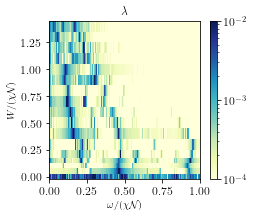

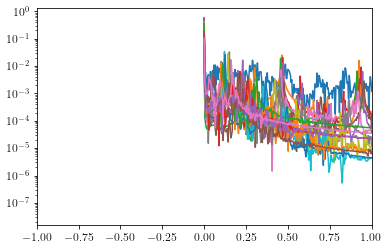

In [198]:
import sys
sys.path.append(f'/home/ricval/Documenti/Cavity_python/library')
import chaos
name_obs = 's01'

plot_dir = '/home/ricval/Documenti/Cavity/DPT_SUn_paper/final_images/'
p = 0.32
height_images = 7.4
x_1 = 0.22
y_1 = 0.6
width = 0.37
height = 0.3

results_dir = '/home/ricval/Documenti/Cavity_python/lyapunov_gaussian_states_swipe_W_v2/'
results_dir = '/home/ricval/Documenti/Cavity_python/data_paper/SU3_Gaussian_p_vs_W/'

folder = f'{main_dir}SUN_Gaussian_L{L}_p{p:.3f}_W{W:.3f}_index{idx}'


symbol = ['v','o','^','D']
style = ['-','-','dotted']
color = ['tab:blue','tab:red']
color_marker = ['tab:green','tab:orange','tab:blue','tab:red']
text = ["IV${{}}^\star$","IV","IV${{}}^\star$","I"]

json_file = ""

name_swipe = "W"
L = 10000
d = 3

W_list = [j * 0.05 for j in range(30)]
# W_list = [j * 0.01 for j in range(80)]

W_list = np.round(np.array(W_list),2)
W_plot = [0.02,0.08,0.1,1.7]
W_plot = [0.02,0.1,0.2,1.7]

# W_list = [0.01,0.02,0.03,0.04,0.05]
fig, ax = plt.subplots(1,1,figsize=(cm2inch(width_images), cm2inch(height_images)))
ax.set_xlabel('$W/(\chi\mathcal{{N}})$')
ax.set_title('$\lambda$')

# insets position 
# ax_1 | ax_2
# ax_3 | ax_4

# ax_1 = ax.inset_axes([x_1 , y_1 , width, height])
# ax_2 = ax.inset_axes([x_1 + width , y_1 , width, height])
# ax_3 = ax.inset_axes([x_1 , y_1 - height , width, height])
# ax_4 = ax.inset_axes([x_1 + width , y_1 - height , width, height])

# ax_1.get_xaxis().set_visible(False)
# ax_2.get_xaxis().set_visible(False)
# ax_2.get_yaxis().set_visible(False)
# ax_4.get_yaxis().set_visible(False)

# ax_1.set_title('$\overline{\Sigma}_{{1,2}}$',x=1,fontsize=8)

# for a in [ax_3,ax_4]:   
#     a.set_xlabel('$t\chi\mathcal{{N}}$',fontsize=8)

# ax_inset = [ax_1,ax_2,ax_3,ax_4]
# for a in ax_inset:
#     a.tick_params(axis='both', which='major', labelsize=8)
#     a.tick_params(axis='both', which='minor', labelsize=8)
    # a.set_ylim([-0.05,1.4])


lyapunov_exponent = []
dlyapunov_exponent = []
W_exist = []
fourier_spectrum = []

F_O = {}
for i in range(d):
    for j in range(i+1,d):
        F_O[f's{i}{j}'] = []

O = {}
for i in range(d):
    for j in range(i+1,d):

        O[f's{i}{j}'] = 0
for W in W_list:

    for idx in range(1):
        if W == 0:
            folder = f'{results_dir}SUN_Gaussian_L1_p{p:.3f}_W{W:.3f}_index{idx}'
        else:
            folder = f'{results_dir}SUN_Gaussian_L{L}_p{p:.3f}_W{W:.3f}_index{idx}'
        if os.path.isdir(folder):

            # print(folder)
            W_exist.append(W)



            time = np.load(f'{folder}/timesteps.npy')
            start = int(len(time)/2)
            dt = time[1] - time[0]

            N  = len(time[start:])
            print(N)
            xf = fftfreq(N, dt)*2*math.pi
            xf = xf[:N//2]
        
            
            for name in list(O.keys()):
                if os.path.isfile(f'{folder}/{name}.npy'):
                    O[name] = np.load(f'{folder}/{name}.npy')

            for name in list(O.keys()):
                yf = fft(np.abs(O[name][start:]))
                print(len(yf))
                yf = yf[:N//2]

                    # F_O[name].append(2.0/N * np.abs(yf[0:N//2]))
                    # F_O[name].append(2.0/N * np.abs(yf[0:50]))
                # yf_pos = np.array(yf[0:N//2])
                # yf_neg = np.array(yf[N//2:])
                # print(len(yf_pos))
                # print(len(yf_neg))
                # y = np.concatenate((yf_neg[::-1],yf_pos))
                F_O[name].append(2.0/N * np.abs(yf))

                
                
# print(len(F_O[name][-1]))
# print(len(F_O[name]))
                
# print(W_exist)



F_obs = np.zeros((len(W_exist),len(xf)))

for i , w in enumerate(W_exist):
    F_obs[i,:] = F_O[name_obs][i]


for name in list(F_O.keys()):
    F_O[name] = np.array(F_O[name])

# print(F_O[name_obs].shape)
print(F_obs.shape)
# print(F_O[name_obs][-1])
W_exist = np.array(W_exist)
print(W_exist.shape)
print(xf.shape)
print(np.amax(F_O[name_obs]))
print(np.amin(F_O[name_obs]))

fig2, ax2 = plt.subplots(1,1)

print(xf)

for j in range(len(F_O[name_obs])):
    ax2.plot(xf,F_O[name_obs][j])

ax2.set_xlim(-1,1)
ax2.set_yscale('log')
pcm = ax.pcolormesh(xf, W_exist, F_O[name_obs]
                    ,norm=LogNorm(vmin= 1E-4, vmax=1E-2)
                    # ,vmin=1E-4,vmax=0.01
                    ,cmap="YlGnBu")

ax.set_xlim([0,1])
# ax.set_yscale('log')
# ax.set_ylim([W_exist[1],W_exist[-1]])
   
fig.colorbar(pcm, ax=ax)#fraction=0.05)
    

ax.set_ylabel('$W/(\chi\mathcal{{N}})$')
ax.set_xlabel('$\omega/(\chi\mathcal{{N}})$')

### Fig. 7 different value of $p$ and different algorithm

/home/ricval/Documenti/Cavity_python/data_paper/SU3_Gaussian_p_vs_W/SUN_Gaussian_L1_p0.320_W0.000_index0


/home/ricval/.local/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 5000
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/ricval/.local/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1107
  warnings.warn(msg.format(lag), RuntimeWarning)
/home/ricval/.local/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 5000
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/home/ricval/.local/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1107
  warnings.warn(msg.format(lag), RuntimeWarning)


KeyboardInterrupt: 

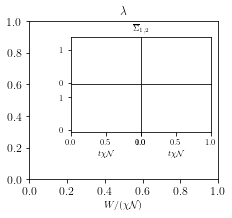

In [54]:
import sys
import nolds
sys.path.append(f'/home/ricval/Documenti/Cavity_python/library')
import chaos

plot_dir = '/home/ricval/Documenti/Cavity/DPT_SUn_paper/final_images/'

p = 0.32

height_images = 7.4
x_1 = 0.22
y_1 = 0.6
width = 0.37
height = 0.3

results_dir = '/home/ricval/Documenti/Cavity_python/data_paper/SU3_Gaussian_p_vs_W/'


symbol = ['v','o','^','D']
style = ['-','-','dotted']
color = ['tab:blue','tab:red']
color_marker = ['tab:green','tab:orange','tab:blue','tab:red']
text = ["IV${{}}^\star$","IV","IV${{}}^\star$","I"]

json_file = ""

name_swipe = "W"
L = 10000
d = 3

W_list = [j * 0.01 for j in range(170)]
W_list = np.round(np.array(W_list),2)
W_plot = [0.03,0.4,1.16,1.6]
W_plot = [0.01,0.08,0.1,1.7]
# Phase-IV* W = 0.01
# Phase-IV W = 0.08
# Phase-III W=0.1
# Phase-I W=1.7
# W_list = [1]

    
fig, ax = plt.subplots(1,1,figsize=(cm2inch(width_images), cm2inch(height_images)))
ax.set_xlabel('$W/(\chi\mathcal{{N}})$')
ax.set_title('$\lambda$')

# insets position 
# ax_1 | ax_2
# ax_3 | ax_4

ax_1 = ax.inset_axes([x_1 , y_1 , width, height])
ax_2 = ax.inset_axes([x_1 + width , y_1 , width, height])
ax_3 = ax.inset_axes([x_1 , y_1 - height , width, height])
ax_4 = ax.inset_axes([x_1 + width , y_1 - height , width, height])

ax_1.get_xaxis().set_visible(False)
ax_2.get_xaxis().set_visible(False)
ax_2.get_yaxis().set_visible(False)
ax_4.get_yaxis().set_visible(False)

ax_1.set_title('$\overline{\Sigma}_{{1,2}}$',x=1,fontsize=8)

for a in [ax_3,ax_4]:   
    a.set_xlabel('$t\chi\mathcal{{N}}$',fontsize=8)

ax_inset = [ax_1,ax_2,ax_3,ax_4]
for a in ax_inset:
    a.tick_params(axis='both', which='major', labelsize=8)
    a.tick_params(axis='both', which='minor', labelsize=8)
    a.set_ylim([-0.05,1.4])


lyapunov_exponent = []
dlyapunov_exponent = []
W_exist = []

for W in W_list:

    O = {}
    for i in range(d):
        for j in range(i+1,d):
            O[f's{i}{j}'] = []

    exist = 0
    for idx in range(1):
        if W == 0:
            folder = f'{results_dir}SUN_Gaussian_L1_p{p:.3f}_W{W:.3f}_index{idx}'
        else:
            folder = f'{results_dir}SUN_Gaussian_L{L}_p{p:.3f}_W{W:.3f}_index{idx}'

        if os.path.isdir(folder):
            if idx == 0:
                print(folder)

            for name in list(O.keys()):
                if os.path.isfile(f'{folder}/{name}.npy'):
                    O[name].append(np.abs(np.load(f'{folder}/{name}.npy')))
            time = np.load(f'{folder}/timesteps.npy')

            if W in W_plot and idx < 2:
                ax_inset[W_plot.index(W)].plot(time,O['s01'][-1]/O['s01'][-1][0],linewidth=0.8,linestyle=style[idx],color=color[idx])
                x_text = 0.8
                y_text = 0.3
                # if W_plot.index(W) == 0:
                #     y_text = 0.2
                # elif W_plot.index(W) == 1:
                #     y_text  = 0.7
                # elif W_plot.index(W) == 2:
                #     y_text  = 0.5
                
                # ax[W_plot.index(W)].text(x_text,y_text, f'$W/\chi={W:.2f}$ ({text[W_plot.index(W)]})', transform=ax[W_plot.index(W)].transAxes, size=6)
                ax_inset[W_plot.index(W)].text(x_text,y_text, f'{text[W_plot.index(W)]}', transform=ax_inset[W_plot.index(W)].transAxes, size=8)

            
            exist += 1
            lyapunov_exponent_temp = [] 
            for name in list(O.keys()):
                lyapunov_exponent_temp.append(nolds.lyap_r(O[name][-1] , tau = time[1]-time[0] ,debug_plot=False))


    if exist > 0:
        W_exist.append(round(W,2))
        # l , t,  dO = chaos.compute_lyapunov_exponent(O,time,max_dO=1E-3,order=1)
        lyapunov_exponent.append(max(lyapunov_exponent_temp))
        dlyapunov_exponent.append(0)


xmin , xmax = ax_1.get_xlim()
ymin , ymax = ax_1.get_ylim()

for idx, a in enumerate(ax_inset):
    x = xmin + 0.7*(xmax-xmin)
    y = ymax - 0.2*(ymax-ymin)
    a.scatter(x,y,marker=symbol[idx],color=color_marker[idx],linewidths=1,edgecolors='black',zorder=2)

ax_3.set_xticks([100,1000,2500])
ax_4.set_xticks([100,1000,2500])

print(W_exist)

for idx, l in enumerate(lyapunov_exponent):
    if l < 0.001:
        lyapunov_exponent[idx] = 0

for idx, w in enumerate(W_plot):
    if w in W_exist:
        ax.plot(w,lyapunov_exponent[W_exist.index(w)],marker=symbol[idx],color=color_marker[idx],markersize=8,markeredgewidth=1,markeredgecolor='black')

ax.axhline(y=0, color='grey', linestyle='--',linewidth=linewidth)
ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6])

ax.errorbar(W_exist,lyapunov_exponent,yerr=dlyapunov_exponent,linestyle='-',color='black',linewidth=linewidth,marker='.',markersize=2)
# fig_l.savefig(f"lyapunov_exponent_gaussian_state_L{L}_swipe_W.pdf",bbox_inches='tight',pad_inches = 0)

fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=0)

# fig.savefig(f"{plot_dir}lyapunov_exponent_and_dynamics_gaussian_state_L{L}_p1_3_swipe_W_v2.pdf",bbox_inches='tight',pad_inches = 0)
plt.show()

### Fig.7 - new idea : main plot with different values of $W$ showing Phase-IV${}^\star$, Phase-IV, Phase-III,Phase-II,Phase-I (if I manage to put all these). And inset the heatmap of the Lyapunov exponents

<ipython-input-228-ceff847ba84e>:90: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


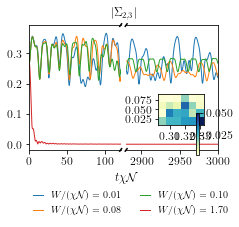

In [228]:
sys.path.append('/home/ricval/Documenti/Cavity_python/library')
import chaos
from matplotlib.colors import LogNorm

main_dir = '/home/ricval/Documenti/Cavity_python/data_paper/SU3_Gaussian_p_vs_W/'
plot_dir = '/home/ricval/Documenti/Cavity/DPT_SUn_paper/final_images'

name_obs_plot = 's01'

height_images = 8
fig, (ax1,ax2) = plt.subplots(1,2,sharex=False,sharey=True,figsize=(cm2inch(width_images), cm2inch(height_images)),constrained_layout=True)

ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.get_yaxis().set_visible(False)

ax_1 = ax2.inset_axes([0.35,0.20,0.5,0.25  ])

L = 10000
d = 3


# p_list = [0.320]
p = 0.32
W_list = [0.10 + j * 0.02 for j in range(3)]
W_list = [0.01,0.08,0.1,1.7]
# Phase-IV* W = 0.01
# Phase-IV W = 0.08
# Phase-III W=0.1
# Phase-I W=1.7
# W_list = [1]

    

for index_W, W in enumerate(W_list):

    O = {}
    for i in range(d):
        for j in range(i+1,d):
            O[f's{i}{j}'] = []

    for idx in range(1):
            
        folder = f'{main_dir}SUN_Gaussian_L{L}_p{p:.3f}_W{W:.3f}_index{idx}'
        if os.path.isdir(folder):
                
            for name in list(O.keys()):
                if os.path.isfile(f'{folder}/{name}.npy'):
                    O[name] = np.abs(np.load(f'{folder}/{name}.npy'))
            time = np.load(f'{folder}/timesteps.npy')


            ax1.plot(time,O[name_obs_plot],linewidth=linewidth,label=f'$W/(\chi\mathcal{{N}})={W:.2f}$')
            ax2.plot(time,O[name_obs_plot],linewidth=linewidth)


    # plt.tight_layout()
            
    # plt.show()
        

ax1.set_xlim([0,120])
ax2.set_xlim([2880,3000])

ax1.xaxis.set_ticks(np.arange(0, 150, 50 ))
ax2.xaxis.set_ticks(np.arange(2900, 3010, 50 ))
ax1.legend(ncol=2,frameon=False,loc='lower center',bbox_to_anchor=(1.10, -0.6),handlelength=1)

fig.supxlabel('$t\chi\mathcal{{N}}$',y=0.15,x=0.53)
fig.suptitle('$|\Sigma_{2,3}|$',y=0.93,x=0.53)

# ax_1.set_xlim([-1.8,1.8])
# ax_1.set_ylim([1E-3,0.1])
# ax_1.set_yscale('log')
# # ax_1.set_xlabel('$\omega/(\chi\mathcal{{N}})$',fontsize=8)
# ax_1.set_title('$\mathcal{F}[|\Sigma_{2,3}|](\omega/(\chi\mathcal{{N}}))$',fontsize=8)
# ax_1.xaxis.set_ticks([0,0.8,1.6])
# ax_1.tick_params(axis='both', which='major', labelsize=8)
# ax_1.tick_params(axis='both', which='minor', labelsize=8)




# axs[1].set_xlabel('$\omega$')

# axs[0].set_title('$\overline{\Sigma}_{2,1}(t)$',fontsize=11)
# axs[1].set_title('$\mathcal{F}[\overline{\Sigma}_{2,1}(t)](\omega)$',fontsize=11)
# axs[1].yaxis.tick_right()

plt.tight_layout()

fig.subplots_adjust(wspace=0.06)
fig.subplots_adjust(bottom=0.3)


d = .01  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1-d, 1+d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax1.plot((1-d, 1+d), (- d, + d), **kwargs)  # bottom-left diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((- d, + d), (- d, + d), **kwargs)  # bottom-right diagonal

# plt.savefig(f'{plot_dir}/dynamics_and_fourier_SU4_swipe_W.pdf',bbox_inches='tight',pad_inches = 0)



###########################################################
# inset of a heatmap


d = 3
p_list =  [0.305, 0.310, 0.315, 0.320, 0.325, 0.330]
W_list = [0.01 * j for j in range(2,10,2)]
# W_list += [0.10 + 0.01 * j for j in range(2,10,2)]
# W_list += [0.20 + 0.01 * j for j in range(2,10,2)]
W_list.sort()


lyapunov_exponent = []


for W in W_list:

    lyapunov_exponent_single_p = []
    dlyapunov_exponent_single_p = []
    
    for p in p_list:
    
        O = {}
        for i in range(d):
            for j in range(i+1,d):
                O[f's{i}{j}'] = []
    
        exist = 0
        for idx in range(12):
            
            folder = f'{main_dir}SUN_Gaussian_L{L}_p{p:.3f}_W{W:.3f}_index{idx}'

            if os.path.isdir(folder):
                for name in list(O.keys()):
                    if os.path.isfile(f'{folder}/{name}.npy'):
                        O[name].append(np.abs(np.load(f'{folder}/{name}.npy')))
                time = np.load(f'{folder}/timesteps.npy')                    
                exist += 1
            

        if exist > 2:
            l , t,  dO = chaos.compute_lyapunov_exponent(O,time,max_dO=1E-3,order=1)
            lyapunov_exponent_single_p.append(l[0])
            dlyapunov_exponent_single_p.append(l[1])
            
            
        else:
            lyapunov_exponent_single_p.append(float('nan'))
            dlyapunov_exponent_single_p.append(float('nan'))

    lyapunov_exponent.append(lyapunov_exponent_single_p)

pcm = ax_1.pcolormesh(p_list,W_list,lyapunov_exponent
                    # ,norm=LogNorm(vmin= 1E-2, vmax=1)
                    ,cmap="YlGnBu")

fig.colorbar(pcm, ax=ax_1,location='right')

plt.show()


### Scaling analysis as a function of $L$ for chaos depleted via disorder (see Fig. 7). In particular, I want to see if the bump of chaos at $W\approx 1$ is a numerical artifact due to finite size effects or not. 

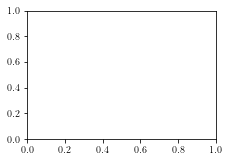

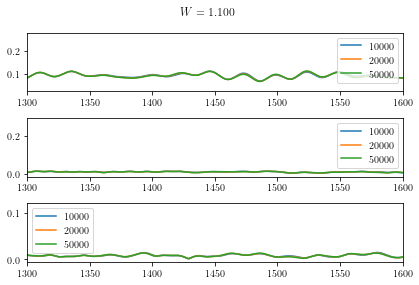

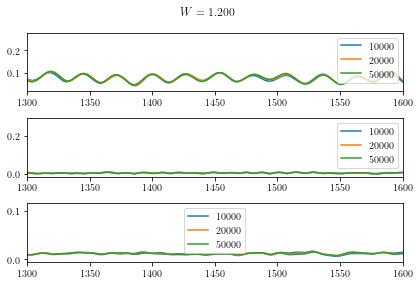

In [7]:
sys.path.append('/home/ricval/Documenti/Cavity_python/library')
import chaos
from matplotlib.colors import LogNorm

main_dir = '/home/ricval/Documenti/Cavity_python/heatmap_dynamical_phase/'
main_dir = '/home/ricval/Documenti/Cavity_python/data_paper/SU3_Gaussian_p_vs_W/'
height_images = 6


symbol = ['v','o','^','D']
style = ['-','-','dotted']
color = ['tab:blue','tab:red']
do_plots = True
main_dir
json_file = ""
save_data = False
name_swipe = "W"
L = 10000
d = 3

L_list = [10000,15000,20000,50000]
p = 0.32
W_list = [1.1,1.2]

fig, ax = plt.subplots(1,1,sharey='row',sharex=True,figsize=(cm2inch(width_images), cm2inch(height_images)))

lyapunov_exponent = []
parameter = []

Delta_O = {}
for i in range(d):
    for j in range(i+1,d):
        Delta_O[f's{i}{j}'] = []

ncol = int(np.sqrt(len(W_list)))
ncol = 1
nrow = 3


for W in W_list:
    
    fig, ax = plt.subplots(nrow,ncol)
    ax = ax.flatten()
    
    parameter_single_p = []
    O_max = {}
    for i in range(d):
        for j in range(i+1,d):
            O_max[f's{i}{j}'] = []

    for _ , L in enumerate(L_list):

        O = {}
        for i in range(d):
            for j in range(i+1,d):
                O[f's{i}{j}'] = []

        exist = 0
        for idx in range(1):
            
            folder = f'{main_dir}SUN_Gaussian_L{L}_p{p:.3f}_W{W:.3f}_index{idx}'
            if os.path.isdir(folder):
                
                for name in list(O.keys()):
                    if os.path.isfile(f'{folder}/{name}.npy'):
                        O[name] = np.abs(np.load(f'{folder}/{name}.npy'))
                time = np.load(f'{folder}/timesteps.npy')

                for index, name in enumerate(list(O.keys())):
                    ax[index].plot(time,O[name],label=f'{L}')

                exist += 1

    fig.suptitle(f'$W={W:.3f}$')

    for a in ax:
        a.set_xlim([time[-1]-500,time[-1]])
        # a.set_xlim([2800,3000])
        a.set_xlim([1300,1600])
        a.legend()

    plt.tight_layout()
            
    plt.show()
        

### Supplemental material plot - Lyapunov exponent details calculation. We show the abrupt change of slope.

100
[0.28   0.2805 0.2811 0.2816 0.2822 0.2827 0.2832 0.2838 0.2843 0.2848
 0.2854 0.2859 0.2865 0.287  0.2875 0.2881 0.2886 0.2892 0.2897 0.2902
 0.2908 0.2913 0.2919 0.2924 0.2929 0.2935 0.294  0.2945 0.2951 0.2956
 0.2962 0.2967 0.2972 0.2978 0.2983 0.2989 0.2994 0.2999 0.3005]
[0.301  0.3015 0.3021 0.3026 0.3032 0.3037 0.3042 0.3048 0.3053 0.3059
 0.3064 0.3069 0.3075 0.308  0.3086 0.3091 0.3096 0.3102 0.3107 0.3112
 0.3118 0.3123 0.3129 0.3134 0.3139 0.3145 0.315  0.3156 0.3161 0.3166
 0.3172 0.3177 0.3182 0.3188 0.3193 0.3199 0.3204 0.3209 0.3215 0.322
 0.3226 0.3231 0.3236 0.3242 0.3247 0.3253 0.3258 0.3263 0.3269 0.3274
 0.3279 0.3285 0.329  0.3296 0.3301 0.3306 0.3312 0.3317 0.3323 0.3328
 0.3333]
1000
[0.28   0.2805 0.2811 0.2816 0.2822 0.2827 0.2832 0.2838 0.2843 0.2848
 0.2854 0.2859 0.2865 0.287  0.2875 0.2881 0.2886 0.2892 0.2897 0.2902
 0.2908 0.2913 0.2919 0.2924 0.2929 0.2935 0.294  0.2945 0.2951 0.2956
 0.2962 0.2967 0.2972 0.2978 0.2983 0.2989 0.2994 0.2999 0.3005 0.

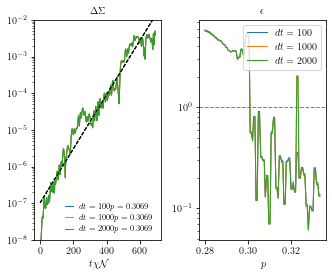

In [47]:
sys.path.append('/home/ricval/Documenti/Cavity_python/library')
import chaos
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.signal import argrelextrema

plot_dir = '/home/ricval/Documenti/Cavity/DPT_SUn_paper/final_images/'

dt_ratio_list = [100,1000,2000]
    

L = 1
d = 3
W = 0
coupling = 0.36
p_list = np.linspace(0.28,1/3,num=100)
for idx, p in enumerate(p_list):
    p_list[idx] = round(p,4)
p_plot = [0.3226,0.3231]
p_plot = [0.3069]
height_images = 10
width_images = 12
fig, (ax,ax_1) = plt.subplots(1,2,figsize=(cm2inch(width_images), cm2inch(height_images)))

ax.set_title('$\Delta\Sigma$')
ax.set_xlabel('$t\chi\mathcal{{N}}$')
ax.set_yscale('log')

ax_1.set_title('$\epsilon$')
ax_1.set_yscale('log')
ax_1.set_xlabel('$p$')
ax_1.axhline(y=1, color='grey', linestyle='--',linewidth=1)

for dt_ratio in dt_ratio_list:

    results_dir = f'/home/ricval/Documenti/Cavity_python/data_paper/SU3_Lyapunov_swipe_p_W{W:.2f}_1E-8_dt{dt_ratio}/'
    p_exist = []
    error_list = []
    for p in p_list:

        exist = 0

        O = {}
        for i in range(d):
            for j in range(i+1,d):
                O[f's{i}{j}'] = []

        for idx in range(12):
            folder = f'{results_dir}SU{d}_Gaussian_L{L}_p{p:.3f}_W{W:.3f}_index{idx}'

            if os.path.isdir(folder):
                exist += 1
                
                time = np.load(f'{folder}/timesteps.npy')
                index_t = time < 100000
                time = time[index_t]
                for name in list(O.keys()):
                    if os.path.isfile(f'{folder}/{name}.npy'):
                        o = np.load(f'{folder}/{name}.npy')
                        O[name].append(o[index_t])
    
            else:
                folder = f'{results_dir}SU{d}_Gaussian_L{L}_alpha{coupling:.2f}_p{p:.3f}_W{W:.3f}_index{idx}'
                if os.path.isdir(folder):
                    exist += 1
                    
                    time = np.load(f'{folder}/timesteps.npy')
                    index_t = time < 100000
                    time = time[index_t]
                    for name in list(O.keys()):
                        if os.path.isfile(f'{folder}/{name}.npy'):
                            o = np.load(f'{folder}/{name}.npy')
                            O[name].append(o[index_t])

        if exist > 2:
            p_exist.append(p)
            
            l , t, dO , error = chaos.compute_average_lyapunov_exponent(O,time,max_dO=np.log(0.005),min_dO=-20,order=10,transient=0)
            dO_av = dO[0]
            dO_st = dO[1]

            index = np.argmax(dO_av > np.log(0.005))
            if index == 0:
                index = len(dO_av)
            dO_av = dO_av[:index]
            dO_st = dO_st[:index]
            t = t[:index]


            index = dO_av > -20

            dO_av = dO_av[index]
            dO_st = dO_st[index]
            t = t[index]

            [m, q]  , residual_exp , _ , _ , _ = np.polyfit(t, dO_av, 1,w = 1/ dO_st,full=True)
            [alpha , beta] , residual_pol , _ , _ , _ = np.polyfit(np.log(t), dO_av, 1,w = 1/  dO_st,full=True)

            error_list.append(residual_exp[0]/residual_pol[0])
            if p in p_plot:

                [m, q]  , residual_exp , _ , _ , _ = np.polyfit(t, dO_av, 1,w = 1/ dO_st,full=True)
                [alpha , beta] , residual_pol , _ , _ , _ = np.polyfit(np.log(t), dO_av, 1,w = 1/  dO_st,full=True)
                ax.plot(t,np.exp(dO_av),label=f'$dt={dt_ratio} p={p:.4f}$',linewidth=1)

                if residual_exp[0] < residual_pol[0]:
                    ax.plot(t,np.exp(m*t)*np.exp(q),linestyle='--',color='black',linewidth=1)
                    
                else:
                    ax.plot(t,np.exp(beta)*(t**alpha),linestyle='-',color='black',linewidth=1)

    error_list = np.array(error_list)
    p_exist = np.array(p_exist)

    ax_1.plot(p_exist,error_list,label=f'$dt={dt_ratio}$',linewidth=1)    
    ax.set_yscale('log')
    ax.set_ylim([1E-8,1E-2])

    print(dt_ratio)
    print(p_exist[error_list>1])   
    print(p_exist[error_list < 1])

ax.legend(ncol=1,frameon=False,handlelength=1,fontsize=8)
ax_1.legend()

plt.tight_layout()

plt.show()

